# Climate catastrophe<br><br>
<br><br>
## Data analysis on changes in average temperatures<br><br>
<br><br>
Project analyzing data on changes in average temperatures. The `csv` file containing the raw data can be found at [kaggle.com](https://www.kaggle.com/datasets/sevgisarac/temperature-change)

### Import

In[ ]:

In[25]:

In [1]:
import plotly.offline as pyo
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.interpolate import splrep, splev

### DataFrame

In[ ]:

Default value

In[26]:

In [2]:
pd.set_option("display.width", 80)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In[ ]:

Default DataFrame

In[27]:

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/Environment_Temperature_change_E_All_Data_NOFLAG.csv", 
                 encoding="Windows-1250")  # index_col=False

df.head(1)

In[ ]:

In[7]:

In [4]:
df.shape

(9656, 66)

In[ ]:

Columns name rename, where \s (inside names) into _

In[28]:

In [5]:
df = df.rename(columns={"Area Code": "Area_Code",
                        "Months Code": "Months_Code",
                        "Element Code": "Element_Code"})

In[ ]:

Replacing comas in string

In[29]:

In [6]:
df['Area'] = df['Area'].str.replace(',', '')

Replacing quote in string

In[10]:

In [7]:
df['Area'] = df['Area'].str.replace('\"', '')

In[ ]:

Optional 1 !!! (Jaro is using this in his part o code)<br><br>
Adding continent name & continent number columns. To have those columns added to default dataframe.<br><br>
1. Reading and creating additional frame, for join puprose (from '_Countries_Continents.csv' file)<br><br>
2. Inner join default dataframe with two new columns (continents for each country)<br><br>
(every rows containing country name will stay in df)<br><br>
(every rows containing geo-region name will not stay in df)

In[30]:

In [8]:
def optional_1(df):
    continent = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/_Countries_Continents.csv", names=[
                            'Area', 'Continent', 'Continent_Code'], encoding="UTF-8")
    df = pd.merge(left=continent, right=df, on='Area', how='inner')
    return df

In[ ]:

Optional 2 !!! (Jaro is using this in his part o code)<br><br>
1. Remove each row that contain 'Standard Deviation' value in column 'Element_Code' (code: 7271)<br><br>
2. For loop that will iterate each row (separately), searching NaN values in last 59 columns (year columns).<br><br>
After each iteration every NaN will be updated to row mean value (from 59 year columns for each row separately)<br><br>
new df is returned but it must be override, like: "df_new = optional_2(df)"<br><br>
(of course this can be the same variable: "df = optional_2(df)" )

In[31]:

In [9]:
def optional_2(df):
    df = df.loc[(df['Element_Code'] == 7271) & (df['Area_Code'] < 5000)]
    for i in range(df.shape[0]-1):
        m = round(df.iloc[i, -59:].mean(), 3)
        df.iloc[i, -59:] = df.iloc[i, -59:].fillna(m)
    return df

#### JARO

#### Displayng all rows in dataframe<br><br>
`pd.set_option('display.max_rows', None)`

In[ ]:

In[13]:

In [10]:
jaro1 = df.copy()

In[ ]:

In[14]:

In [11]:
jaro1.columns = jaro1.columns.str.replace('Y', '')

#### Whole World temperatures (1961-2019)

In[ ]:

In[15]:

In [12]:
world_t = jaro1.loc[(jaro1['Area_Code'] == 5000) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# world_t.iloc[:,-59:].isna().sum()
world_t_ok = world_t.iloc[:, -59:]

#### Africa temperatures (1961-2019)

#### Africa temperatures (1961-2019)

In[ ]:

In[16]:

In [13]:
africa_t = jaro1.loc[(jaro1['Area_Code'] == 5100) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# africa_t.iloc[:,-59:].isna().sum()
africa_t_ok = africa_t.iloc[:, -59:]

#### Caribbean, Northern & Central Americas temperatures (1961-2019)

In[ ]:

In[17]:

In [14]:
north_america_t = jaro1.loc[((jaro1['Area_Code'] == 5203) | (jaro1['Area_Code'] == 5204) | (jaro1['Area_Code'] == 5206))
                            & (jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# north_america_t.iloc[:,-59:].isna().sum()
north_america_t_ok = north_america_t.iloc[:, -59:].mean()

#### South America temperatures (1961-2019)

In[ ]:

In[15]:

In [15]:
south_america_t = jaro1.loc[(jaro1['Area_Code'] == 5207) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# south_america_t.iloc[:,-59:].isna().sum()
south_america_t_ok = south_america_t.iloc[:, -59:]

#### Asia temperatures (1961-2019)

In[ ]:

In[16]:

In [16]:
asia_t = jaro1.loc[(jaro1['Area_Code'] == 5300) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# asia_t.iloc[:,-59:].isna().sum()
asia_t_ok = asia_t.iloc[:, -59:]

#### Europe temperatures (1961-2019)

In[ ]:

In[17]:

In [17]:
europe_t = jaro1.loc[(jaro1['Area_Code'] == 5400) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# europe_t.iloc[:,-59:].isna().sum()
europe_t_ok = europe_t.iloc[:, -59:]

#### Oceania temperatures (1961-2019)

In[ ]:

In[18]:

In [18]:
oceania_t = jaro1.loc[(jaro1['Area_Code'] == 5500) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# oceania_t.iloc[:,-59:].isna().sum()
oceania_t_ok = oceania_t.iloc[:, -59:]

#### Antarctica temperatures (1961-2019)

In[ ]:

In[19]:

In [19]:
antarctica_t = jaro1.loc[(jaro1['Area_Code'] == 30) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# oceania_t.iloc[:,-59:].isna().sum()
antarctica_t_ok = antarctica_t.iloc[:, -59:]

In[ ]:

In[20]:

In [20]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = africa_t_ok.values.T

In[21]:

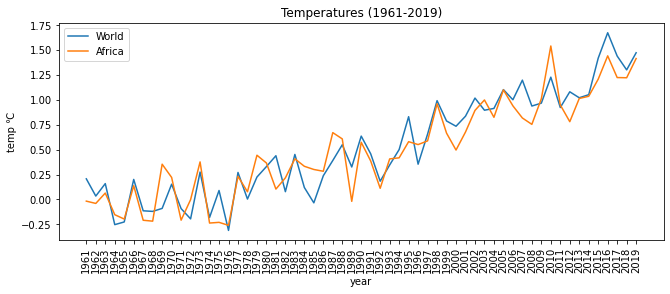

In [21]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Africa')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[22]:

In [22]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = north_america_t_ok.values.T

In[23]:

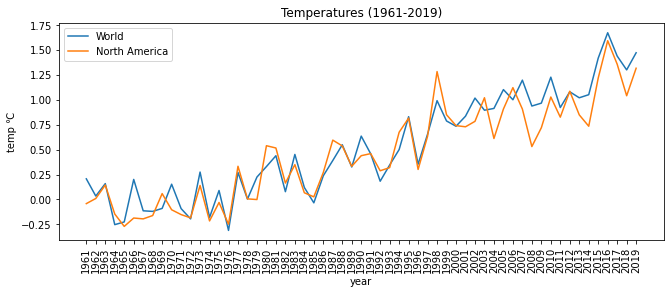

In [23]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='North America')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[24]:

In [24]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = south_america_t_ok.values.T

In[25]:

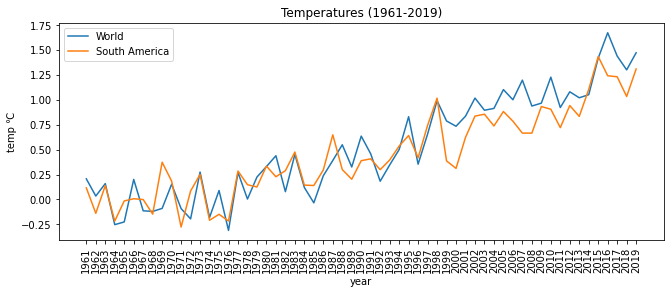

In [25]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='South America')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[26]:

In [26]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = asia_t_ok.values.T

In[27]:

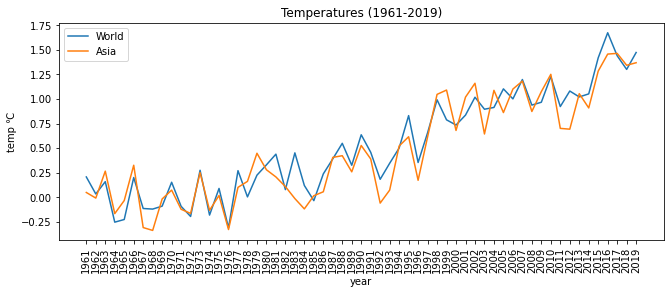

In [27]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Asia')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[28]:

In [28]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = europe_t_ok.values.T

In[29]:

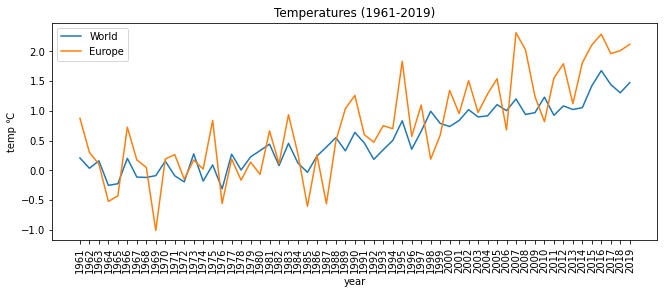

In [29]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Europe')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[30]:

In [30]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = oceania_t_ok.values.T

In[31]:

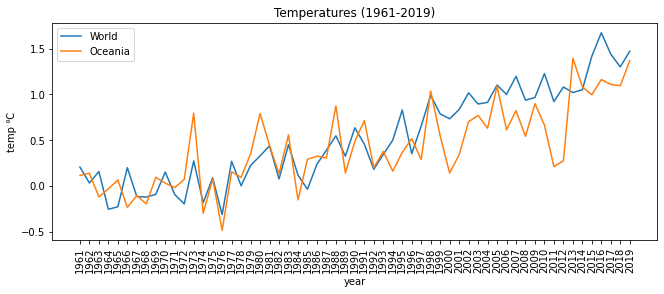

In [31]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Oceania')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[32]:

In [32]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = antarctica_t_ok.values.T

In[33]:

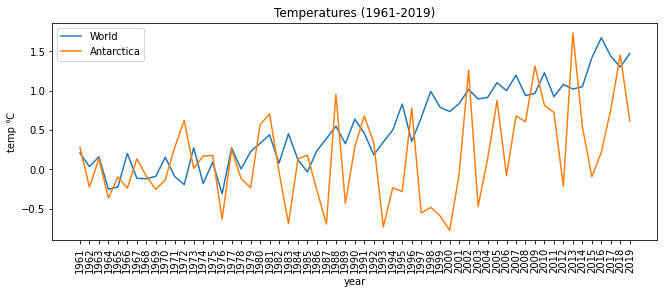

In [33]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Antarctica')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

Using 'Optional 1'

In[ ]:

In[34]:

In [34]:
jaro = optional_1(df)
jaro.columns = jaro.columns.str.replace('Y', '')
jaro.shape

(8228, 68)

Removing specific rows, leaving only those where:<br><br><br>
1. 'Months_Code' is 'Meteorological year'<br><br><br>
2. 'Element_Code' is 'Temperature change'<br><br><br>
3. 'Area_Code' < 5000 means only countries (not regions name)

In[ ]:

In[35]:

In [35]:
jaro = jaro.loc[(jaro['Months_Code'] == 7020) & (
    jaro['Element_Code'] == 7271) & (jaro['Area_Code'] < 5000)]
jaro.shape

(242, 68)

Using 'Optional 2'

In[ ]:

In[36]:

In [36]:
jaro = optional_2(jaro)
jaro.shape

(242, 68)

#### If optional_1() and/or optional_2() isn't choosen then start from here:

Making individual variable for group purpose working

In[ ]:

In[37]:

In [37]:
jaro = df.copy()

In[38]:

In [38]:
antarctica_t = jaro1.loc[(jaro1['Area_Code'] == 30) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# oceania_t.iloc[:,-59:].isna().sum()
antarctica_t_ok = antarctica_t.iloc[:, -59:]

In[ ]:

In[39]:

In [39]:
jaro.iloc[:, -59:].isna().sum()

Y1961    1369
Y1962    1334
Y1963    1362
Y1964    1404
Y1965    1375
Y1966    1292
Y1967    1309
Y1968    1311
Y1969    1330
Y1970    1348
Y1971    1353
Y1972    1333
Y1973    1262
Y1974    1282
Y1975    1376
Y1976    1447
Y1977    1399
Y1978    1329
Y1979    1366
Y1980    1373
Y1981    1380
Y1982    1419
Y1983    1451
Y1984    1397
Y1985    1440
Y1986    1388
Y1987    1372
Y1988    1383
Y1989    1399
Y1990    1417
Y1991    1498
Y1992    1302
Y1993    1341
Y1994    1283
Y1995    1247
Y1996    1217
Y1997    1347
Y1998    1286
Y1999    1332
Y2000    1314
Y2001    1415
Y2002    1344
Y2003    1266
Y2004    1241
Y2005    1232
Y2006    1153
Y2007    1122
Y2008    1181
Y2009    1237
Y2010    1221
Y2011    1219
Y2012    1306
Y2013    1229
Y2014    1279
Y2015    1295
Y2016    1308
Y2017    1290
Y2018    1307
Y2019    1291
dtype: int64

=======================

In[3]:

In [40]:
el_la = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/El-Nino.csv", sep=';', encoding="Windows-1250")
# el_la

In[4]:

In [41]:
el_la_to_drop = [1950, 1951, 1952, 1953,
                 1954, 1955, 1956, 1957, 1958, 1959, 1960]

In [42]:
for i in range(len(el_la_to_drop)):
    el_la.drop(el_la[el_la['year'] == el_la_to_drop[i]].index, inplace=True)

In[5]:

In [43]:
el_la.reset_index(drop=True, inplace=True)
# el_la

In[6]:

El NiĂ±o<br>
0.5 START<br>
0.5 Weak<br>
1.0 Moderate<br>
1.5 Strong<br>
2.0 Very Strong<br>
La NiĂ±a<br>
-0.5 START<br>
-0.5 Weak<br>
-1.0 Moderate<br>
-1.5 Strong<br>
-2.0 Very Strong

In[7]:

In [44]:
el_la['mean'] = ''

In[8]:

In [45]:
for i in range(el_la.shape[0]):
    el_la.iloc[i, -1] = round(np.mean(el_la.loc[i][-13:-1]), 1)

In[9]:

In [46]:
el_la.drop(['January', 'February', 'March', 'April', 'May', 'June', 'July',
           'August', 'September', 'October', 'November', 'December'], axis=1, inplace=True)

In[10]:

el_la #.reset_index()

In[11]:

In [47]:
el_la['area'] = 'El Nino - La Nina'

In[12]:

In [48]:
el_la_p = el_la.pivot(index='area', columns='year', values='mean')

In [49]:
el_la_p = el_la_p.reset_index()

In[13]:

In [50]:
el_la_p

year               area   1961   1962  1963   1964  1965   1966   1967  1968  \
0     El Nino - La Nina -0.200 -0.000 0.600 -0.300 1.300 -0.200 -0.300 0.700   

year  1969  ...   2010   2011   2012   2013  2014  2015   2016   2017  2018  \
0    0.400  ... -1.200 -0.600 -0.100 -0.200 0.600 1.700 -0.200 -0.500 0.600   

year  2019  
0    0.300  

[1 rows x 60 columns]

### ================================

In[]:

In [51]:
temp = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/Environment_Temperature_change_E_All_Data_NOFLAG.csv",
                   encoding="Windows-1250")

In[]:

In [52]:
temp['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year'], dtype=object)

In[]:

In [53]:
temp.columns = temp.columns.str.replace('Y', '')
temp.drop('Unit', axis=1, inplace=True)
temp = temp.rename(columns={"Area Code": "area_code",
                            "Area": "area",
                            "Months Code": "months_code",
                            "Months": "months",
                            "Element Code": "element_code",
                            "Element": "element"})
# temp['Months'] = temp['Months'].replace("Decâ€“Janâ€“Feb", "Winter")
# temp['Months'] = temp['Months'].replace("Marâ€“Aprâ€“May", "Spring")
# temp['Months'] = temp['Months'].replace("Junâ€“Julâ€“Aug", "Summer")
# temp['Months'] = temp['Months'].replace("Sepâ€“Octâ€“Nov", "Autumn")

In[]:

Select the row that contains USSR in the area column

In [54]:
ussr_row = temp.loc[temp['area'] == 'USSR']
# ussr_row.loc[:,'1961':'2019'].isna()

In[]:

for loop array

In [55]:
ussr_area = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia',
             'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia',
             'Lithuania', 'Republic of Moldova', 'Russian Federation',
             'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

Check NAN, from-to which year to update from ussr_row variable<br>
for i in range(len(ussr_area)):<br>
    print(temp.loc[temp['area'] == ussr_area[i]].loc[:,'1961':'2019'].isna())

Non loop verision<br>
armenia_row = temp.loc[temp['area'] == 'Armenia']<br>
armenia_row.loc[:,'1961':'2019'].isna()

In[]:

Copy the non-NAN values from USSR row to appropriate NAN value<br>
in years columns in appropriate country-area row (from ussr_area array)

In [56]:
for i in range(len(ussr_area)):
    temp.loc[temp['area'] == ussr_area[i],
             '1961':'1991'] = ussr_row.loc[:, '1961':'1991'].values

Non loop verision<br>
temp.loc[temp['area'] == 'Armenia', '1961':'1991'] = ussr_row.loc[:,'1961':'1991'].values

In[]:

Select the row that contains Belgium-Luxembourg in the area column

In [57]:
belgium_lux_row = temp.loc[temp['area'] == 'Belgium-Luxembourg']
# belgium_lux_row.loc[:,'1961':'2019'].isna()

In[]:

for loop array

In [58]:
bel_lux_area = ['Belgium', 'Luxembourg']

Check NAN, from-to which year to update from bel_lux_area variable<br>
for i in range(len(bel_lux_area)):<br>
    print(temp.loc[temp['area'] == bel_lux_area[i]].loc[:,'1961':'2019'].isna())

In[]:

Copy the non-NAN values from Belgium-Luxembourg row to appropriate NAN value<br>
in years columns in appropriate country-area row (from bel_lux_area array)

In [59]:
for i in range(len(bel_lux_area)):
    temp.loc[temp['area'] == bel_lux_area[i],
             '1961':'1999'] = belgium_lux_row.loc[:, '1961':'1999'].values

In[]:

Select the row that contains Czechoslovakia in the area column

In [60]:
czechoslovakia_row = temp.loc[temp['area'] == 'Czechoslovakia']
# czechoslovakia_row.loc[:,'1961':'2019'].isna()

In[]:

for loop array

In [61]:
czechoslovakia_area = ['Czechia', 'Slovakia']

Check NAN, from-to which year to update from czechoslovakia_area variable<br>
for i in range(len(czechoslovakia_area)):<br>
    print(temp.loc[temp['area'] == czechoslovakia_area[i]].loc[:,'1961':'2019'].isna())

In[]:

Copy the non-NAN values from Czechoslovakia row to appropriate NAN value<br>
in years columns in appropriate country-area row (from czechoslovakia_area array)

In [62]:
for i in range(len(czechoslovakia_area)):
    temp.loc[temp['area'] == czechoslovakia_area[i],
             '1961':'1992'] = czechoslovakia_row.loc[:, '1961':'1992'].values

In[]:

Select the row that contains Yugoslav SFR in the area column

In [63]:
yugoslav_row = temp.loc[temp['area'] == 'Yugoslav SFR']
# yugoslav_row.loc[:,'1961':'2019'].isna()

In[]:

for loop array

In [64]:
yugoslav_area = ['Croatia', 'Slovenia', 'Bosnia and Herzegovina',
                 'North Macedonia', 'Serbia and Montenegro']

Check NAN, from-to which year to update from yugoslav_area variable<br>
for i in range(len(yugoslav_area)):<br>
    print(temp.loc[temp['area'] == yugoslav_area[i]].loc[:,'1961':'2019'].isna())

In[]:

Copy the non-NAN values from Yugoslav SFR row to appropriate NAN value<br>
in years columns in appropriate country-area row (from yugoslav_area array)

In [65]:
for i in range(len(yugoslav_area)):
    temp.loc[temp['area'] == yugoslav_area[i],
             '1961':'1991'] = yugoslav_row.loc[:, '1961':'1991'].values

In[]:

Select the row that contains Serbia and Montenegro in the area column

In [66]:
s_m_row = temp.loc[temp['area'] == 'Serbia and Montenegro']
# s_m_row.loc[:,'1961':'2019'].isna()

In[]:

for loop array

In [67]:
s_m_area = ['Montenegro', 'Serbia']

Check NAN, from-to which year to update from s_m_area variable<br>
for i in range(len(s_m_area)):<br>
    print(temp.loc[temp['area'] == s_m_area[i]].loc[:,'1961':'2019'].isna())

In[]:

Copy the non-NAN values from Serbia and Montenegro row to appropriate NAN value<br>
in years columns in appropriate country-area row (from s_m_area array)

In [68]:
for i in range(len(s_m_area)):
    temp.loc[temp['area'] == s_m_area[i],
             '1961':'2005'] = s_m_row.loc[:, '1961':'2005'].values

In[]:

Select the row that contains Sudan (former) in the area column

In [69]:
sudan_f_row = temp.loc[temp['area'] == 'Sudan (former)']
# sudan_f_row.loc[:,'1961':'2019'].isna()

In[]:

for loop array

In [70]:
sudan_f_area = ['Sudan', 'South Sudan']

Check NAN, from-to which year to update from sudan_f_area variable<br>
for i in range(len(sudan_f_area)):<br>
    print(temp.loc[temp['area'] == sudan_f_area[i]].loc[:,'1961':'2019'].isna())

In[]:

Copy the non-NAN values from Sudan (former) row to appropriate NAN value<br>
in years columns in appropriate country-area row (from sudan_f_area array)

In [71]:
for i in range(len(sudan_f_area)):
    temp.loc[temp['area'] == sudan_f_area[i],
             '1961':'2010'] = sudan_f_row.loc[:, '1961':'2010'].values

In[]:

Select the row that contains Ethiopia PDR in the area column

In [72]:
ethiopia_pdr_row = temp.loc[temp['area'] == 'Ethiopia PDR']
# ethiopia_pdr_row.loc[:,'1961':'2019'].isna()

In[]:

Check NAN, from-to which year to update<br>
emp.loc[temp['area'] == 'Ethiopia'].loc[:,'1961':'2019'].isna()

In[]:

Copy the non-NAN values from Ethiopia PDR row to appropriate NAN value in years columns in Ethiopia row

In [73]:
temp.loc[temp['area'] == 'Ethiopia',
         '1961':'1992'] = ethiopia_pdr_row.loc[:, '1961':'1992'].values

In[]:

In [74]:
temp_c_to_drop = ['USSR', 'Belgium-Luxembourg', 'Czechoslovakia',
                  'Yugoslav SFR', 'Serbia and Montenegro', 'Sudan (former)', 'Ethiopia PDR']

In [75]:
for i in range(len(temp_c_to_drop)):
    temp.drop(temp[temp['area'] == temp_c_to_drop[i]].index, inplace=True)

In[]:

In [76]:
for i in range(temp.shape[0]):
    temp.iloc[i, -59:] = temp.iloc[i, -59:].bfill(axis='rows')
    temp.iloc[i, -59:] = temp.iloc[i, -59:].ffill(axis='rows')

In[]:

del in temp, co2, forest, gdp, urban pop

In [77]:
t_drop_rows = ['Anguilla', 'Belgium-Luxembourg', 'China mainland', 'China Taiwan Province of',
               'Christmas Island', 'Cocos (Keeling) Islands', 'Cook Islands', 'Czechoslovakia',
               'Ethiopia PDR', 'Falkland Islands (Malvinas)', 'French Guiana',
               'French Southern and Antarctic Territories', 'Guadeloupe', 'Holy See', 'Martinique',
               'Mayotte', 'Midway Island', 'Montserrat', 'Netherlands Antilles (former)', 'Niue',
               'Norfolk Island', 'Pitcairn Islands', 'RĂ©union', 'Saint Helena Ascension and Tristan da Cunha',
               'Saint Pierre and Miquelon', 'Serbia and Montenegro', 'South Georgia and the South Sandwich Islands',
               'Sudan (former)', 'Svalbard and Jan Mayen Islands', 'Tokelau', 'USSR', 'Wake Island',
               'Wallis and Futuna Islands', 'Yugoslav SFR']

In [78]:
for i in range(len(t_drop_rows)):
    temp.drop(temp[temp['area'] == t_drop_rows[i]].index, inplace=True)

In[]:

In [79]:
t_rename = {'Bolivia (Plurinational State of)': 'Bolivia',
            'Bosnia and Herzegovina': 'Bosnia and Herz.',
            'Brunei Darussalam': 'Brunei',
            'Caribbean': 'Caribbean small states',
            'Central African Republic': 'Central African Rep.',
            'Congo': 'Congo',
            'CĂ´te d\'Ivoire': 'CĂ´te d\'Ivoire',
            'Democratic Republic of the Congo': 'Dem. Rep. Congo',
            'Dominican Republic': 'Dominican Rep.',
            'Equatorial Guinea': 'Eq. Guinea',
            'Eswatini': 'eSwatini',
            'Falkland Islands (Malvinas)': 'Falkland Is.',
            'French Southern and Antarctic Territories': 'Fr. S. Antarctic Lands',
            'Iran (Islamic Republic of)': 'Iran',
            'Lao People\'s Democratic Republic': 'Laos',
            'Micronesia (Federated States of)': 'Micronesia Fed. Sts.',
            'Republic of Moldova': 'Moldova',
            'Democratic People\'s Republic of Korea': 'North Korea',
            'Pacific Islands Trust Territory': 'Pacific island small states',
            'RĂ©union': 'Reunion',
            'Russian Federation': 'Russia',
            'South Sudan': 'S. Sudan',
            'Slovakia': 'Slovakia',
            'Solomon Islands': 'Solomon Is.',
            'Republic of Korea': 'South Korea',
            'Saint Kitts and Nevis': 'St. Kitts and Nevis',
            'Saint Lucia': 'St. Lucia',
            'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
            'Syrian Arab Republic': 'Syria',
            'China Taiwan Province of': 'Taiwan',
            'United Republic of Tanzania': 'Tanzania',
            'Venezuela (Bolivarian Republic of)': 'Venezuela',
            'Viet Nam': 'Vietnam',
            'United States Virgin Islands': 'Virgin Islands (U.S.)'}

In [80]:
temp['area'] = temp['area'].replace(t_rename)

=====================================================================================

In[]:

El Nino / La Nina (1961-2019)

In [81]:
el_la_plot = el_la_p.iloc[:, -59:]

Whole World temperatures (1961-2019)

In [370]:
world_t = temp.loc[(temp['area_code'] == 5000) & (
    temp['element_code'] == 7271) & (temp['months_code'] == 7020)]

world_t.iloc[:,-59:].isna().sum()

In [371]:
world_t_ok = world_t.iloc[:, -59:]

In[]:

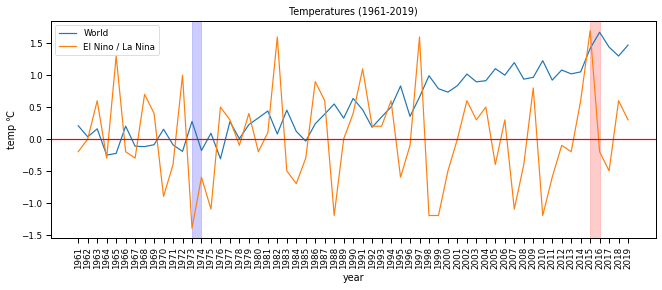

In [372]:
x = world_t_ok.columns
y1 = world_t_ok.values.T
el_la_row = el_la_plot.iloc[0]  # get first row
el_la_array = el_la_row.to_numpy()  # convert row to numpy array
y2 = el_la_array.T
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='El Nino / La Nina')
plt.axhline(y=0.0, color='r', linestyle='-')
ymax = np.max(y2)
ymin = np.min(y2)
for i in range(len(y2)):
    if y2[i] == ymax:
        plt.axvspan(x[i], x[i+1], alpha=0.2, color='red')
    elif y2[i] == ymin:
        plt.axvspan(x[i], x[i+1], alpha=0.2, color='blue')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

=========================================

In [349]:
from prophet import Prophet

In [443]:
# list(x)
y1_list = np.array(y1.T)
y1_list = y1_list.tolist()
# world_t
# world_t_ok

In [469]:
x.shape

(59,)

In [470]:
y1.shape

(59,)

In [471]:
y1 = np.ravel(y1)

In [472]:
y1.shape

(59,)

In [473]:
data = {'ds': x,
        'y': y1}

df = pd.DataFrame(data)

In [474]:
df

ds      y
0   1961  0.207
1   1962  0.034
2   1963  0.159
3   1964 -0.253
4   1965 -0.226
5   1966  0.201
6   1967 -0.114
7   1968 -0.120
8   1969 -0.090
9   1970  0.153
10  1971 -0.092
11  1972 -0.195
12  1973  0.275
13  1974 -0.181
14  1975  0.090
15  1976 -0.311
16  1977  0.271
17  1978  0.004
18  1979  0.225
19  1980  0.330
20  1981  0.439
21  1982  0.078
22  1983  0.452
23  1984  0.120
24  1985 -0.034
25  1986  0.238
26  1987  0.391
27  1988  0.549
28  1989  0.326
29  1990  0.636
30  1991  0.458
31  1992  0.183
32  1993  0.346
33  1994  0.501
34  1995  0.831
35  1996  0.354
36  1997  0.656
37  1998  0.992
38  1999  0.788
39  2000  0.735
40  2001  0.836
41  2002  1.018
42  2003  0.896
43  2004  0.914
44  2005  1.103
45  2006  1.001
46  2007  1.198
47  2008  0.938
48  2009  0.967
49  2010  1.228
50  2011  0.923
51  2012  1.081
52  2013  1.021
53  2014  1.052
54  2015  1.419
55  2016  1.674
56  2017  1.440
57  2018  1.301
58  2019  1.473

In [475]:
m = Prophet()
m.fit(df)

19:10:46 - cmdstanpy - INFO - Chain [1] start processing
19:10:46 - cmdstanpy - INFO - Chain [1] done processing


In [476]:
future_dates = m.make_future_dataframe(periods=31, freq='Y')
forecast = m.predict(future_dates)

In [477]:
from prophet.plot import plot_plotly, plot_components_plotly

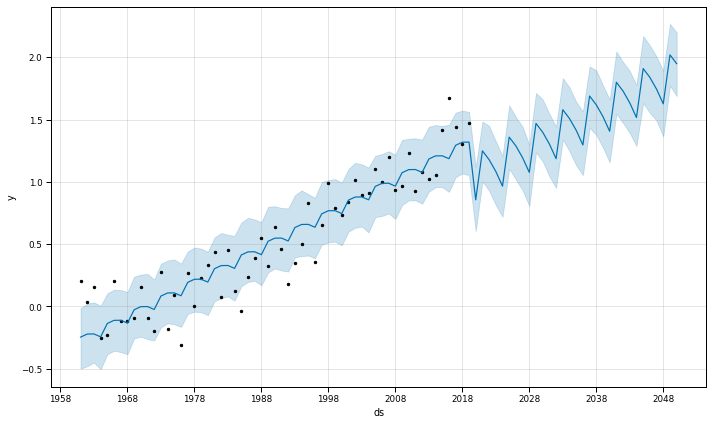

In [478]:
fig1 = m.plot(forecast, uncertainty=True)

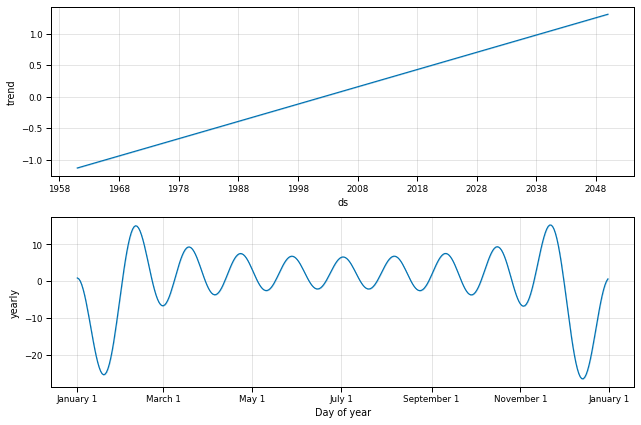

In [479]:
fig2 = m.plot_components(forecast)

In [480]:
from prophet.plot import add_changepoints_to_plot

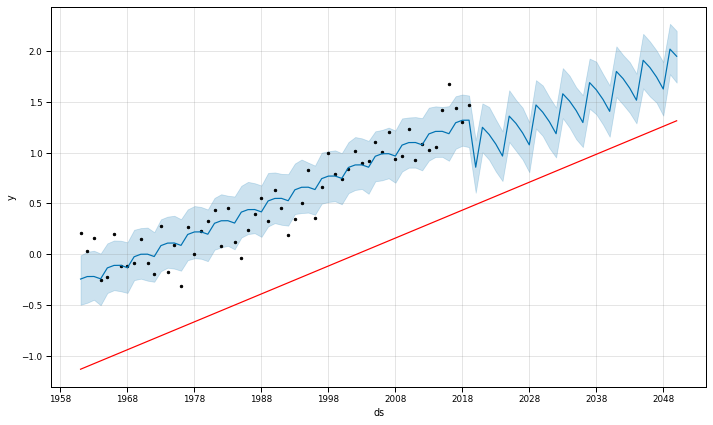

In [481]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

19:11:01 - cmdstanpy - INFO - Chain [1] start processing
19:11:01 - cmdstanpy - INFO - Chain [1] done processing


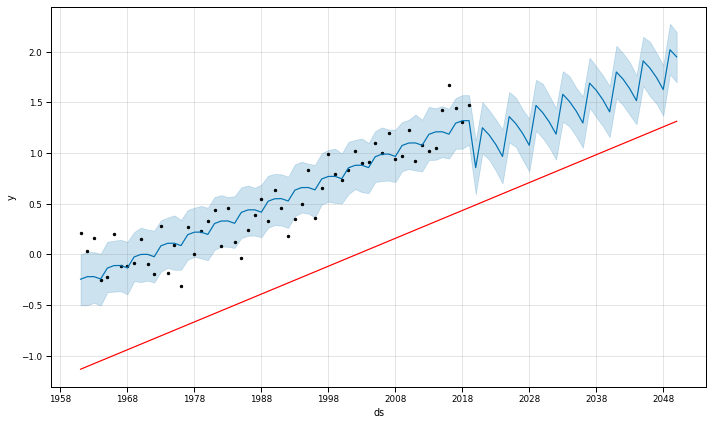

In [482]:

pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

19:11:44 - cmdstanpy - INFO - Chain [1] start processing
19:11:44 - cmdstanpy - INFO - Chain [1] done processing


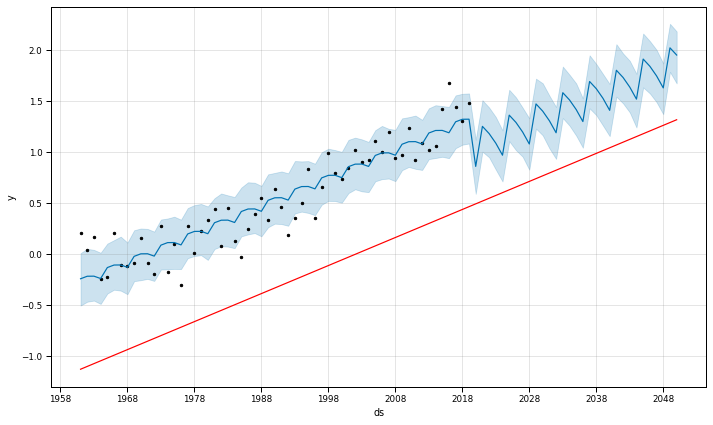

In [483]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

19:12:13 - cmdstanpy - INFO - Chain [1] start processing
19:12:13 - cmdstanpy - INFO - Chain [1] done processing


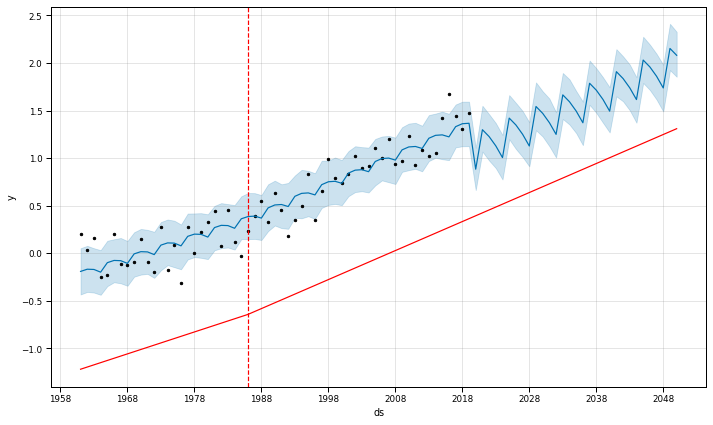

In [484]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

19:12:29 - cmdstanpy - INFO - Chain [1] start processing
19:12:29 - cmdstanpy - INFO - Chain [1] done processing


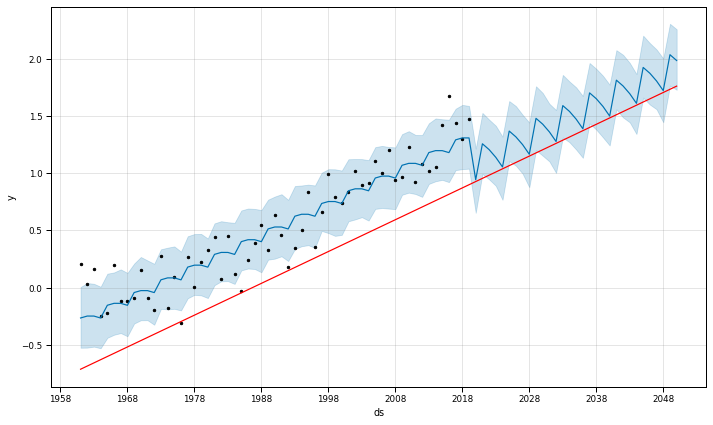

In [485]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

=====================================================================================

In[84]:

In [85]:
pyo.init_notebook_mode()

In [86]:
country_iso3 = pd.read_csv(
    'https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/FAOSTAT_data_11-24-2020.csv', encoding="UTF-8")

In[85]:

In [87]:
country_iso3.columns

Index(['Country Code', 'Country', 'M49 Code', 'ISO2 Code', 'ISO3 Code',
       'Start Year', 'End Year'],
      dtype='object')

In[86]:

In [88]:
country_iso3.drop(columns=['Country Code', 'M49 Code',
                  'ISO2 Code', 'Start Year', 'End Year'], inplace=True)
country_iso3.rename(
    columns={'Country': 'country_name', 'ISO3 Code': 'country_code'}, inplace=True)

In[87]:

In [89]:
iso3_drop_rows = ['Anguilla', 'Belgium-Luxembourg', 'Bermuda', 'China mainland', 'China Taiwan Province of',
                  'Christmas Island', 'Cocos (Keeling) Islands', 'Cook Islands', 'Czechoslovakia',  'Ethiopia PDR',
                  'Falkland Islands (Malvinas)', 'French Guiana', 'French Southern Territories', 'Guadeloupe',
                  'Guam', 'Holy See', 'Martinique', 'Mayotte', 'Midway Island', 'Montserrat',
                  'Netherlands Antilles (former)', 'Niue', 'Norfolk Island', 'Pitcairn', 'RĂ©union',
                  'Saint Helena, Ascension and Tristan da Cunha', 'Saint Pierre and Miquelon', 'Serbia and Montenegro',
                  'Sudan (former)', 'Svalbard and Jan Mayen Islands', 'Tokelau', 'USSR', 'Wake Island',
                  'Wallis and Futuna Islands', 'Yugoslav SFR', 'Africa', 'Ă…land Islands', 'Americas',
                  'Annex I countries', 'Antarctic Region', 'Asia', 'Australia and New Zealand',
                  'Bonaire, Sint Eustatius and Saba', 'Bouvet Island', 'British Indian Ocean Territory', 'Caribbean',
                  'Central America', 'Central Asia', 'Central Asia and Southern Asia', 'China, mainland',
                  'East Asia (excluding China)', 'Eastern Africa', 'Eastern Asia', 'Eastern Asia and South-eastern Asia',
                  'Eastern Europe', 'Europe', 'European Union (27)', 'European Union (28)', 'Germany Fr', 'Germany Nl',
                  'Heard and McDonald Islands', 'High-income economies', 'Jersey', 'Johnston Island',
                  'Land Locked Developing Countries', 'Latin America and the Caribbean', 'Least Developed Countries',
                  'Low income economies', 'Low Income Food Deficit Countries', 'Lower-middle-income economies',
                  'Melanesia', 'Micronesia', 'Middle Africa', 'Net Food Importing Developing Countries',
                  'Non-Annex I countries', 'North Africa (excluding Sudan)', 'Northern Africa', 'Northern America',
                  'Northern America and Europe', 'Northern Europe', 'Northern Mariana Islands', 'Oceania',
                  'Oceania excluding Australia and New Zealand', 'OECD', 'Pacific Islands Trust Territory', 'Polynesia',
                  'Saint BarthĂ©lemy', 'Saint-Martin (French part)', 'Serbia (excluding Kosovo)',
                  'Small Island Developing States', 'South America', 'South Asia (excluding India)',
                  'South Georgia and the South Sandwich Islands', 'South-eastern Asia', 'Southern Africa', 'Southern Asia',
                  'Southern Europe', 'Sub-Saharan Africa', 'Sub-Saharan Africa (including Sudan)',
                  'United States Minor Outlying Islands', 'Upper-middle-income economies', 'Western Africa', 'Western Asia',
                  'Western Asia and Northern Africa', 'Western Europe', 'Western Sahara', 'World', 'Yemen Ar Rp', 'Yemen Dem']

In [90]:
for i in range(len(iso3_drop_rows)):
    country_iso3.drop(
        country_iso3[country_iso3['country_name'] == iso3_drop_rows[i]].index, inplace=True)

In[88]:

In [91]:
df_temp = temp.copy()

In[89]:

In [92]:
df_temp = df_temp.loc[df_temp.element == 'Temperature change']
df_temp.drop(columns=['area_code', 'months_code',
             'element_code', 'element'], inplace=True)
df_temp.rename(columns={'area': 'country_name'}, inplace=True)

In[90]:

In [93]:
df_temp_drop_rows = ['Africa', 'Americas', 'Annex I countries', 'Asia', 'Australia and New Zealand',
                     'Caribbean small states', 'Central America', 'Central Asia', 'Eastern Africa', 'Eastern Asia',
                     'Eastern Europe', 'Europe', 'European Union', 'Land Locked Developing Countries', 'Least Developed Countries',
                     'Low Income Food Deficit Countries', 'Melanesia', 'Micronesia', 'Middle Africa',
                     'Net Food Importing Developing Countries', 'Non-Annex I countries', 'Northern Africa',
                     'Northern America', 'Northern Europe', 'Oceania', 'OECD', 'Polynesia', 'Small Island Developing States',
                     'South America', 'South-Eastern Asia', 'Southern Africa', 'Southern Asia', 'Southern Europe',
                     'Western Africa', 'Western Asia', 'Western Europe', 'Western Sahara', 'World', 'Caribbean',
                     'China mainland', 'Pacific Islands Trust Territory', 'South Georgia and the South Sandwich Islands']

In [94]:
for i in range(len(df_temp_drop_rows)):
    df_temp.drop(df_temp[df_temp['country_name'] ==
                 df_temp_drop_rows[i]].index, inplace=True)

In[91]:

In [95]:
df_temp_rename = {'Bolivia': 'Bolivia (Plurinational State of)',
                  'Bosnia and Herz.': 'Bosnia and Herzegovina',
                  'Brunei': 'Brunei Darussalam',
                  'Central African Rep.': 'Central African Republic',
                  'Taiwan': 'China, Taiwan Province of',
                  'China Hong Kong SAR': 'China, Hong Kong SAR',
                  'China Macao SAR': 'China, Macao SAR',
                  'Dem. Rep. Congo': 'Democratic Republic of the Congo',
                  'Dominican Rep.': 'Dominican Republic',
                  'Eq. Guinea': 'Equatorial Guinea',
                  'eSwatini': 'Eswatini',
                  'Falkland Is.': 'Falkland Islands (Malvinas)',
                  'Fr. S. Antarctic Lands': 'French Southern Territories',
                  'Iran': 'Iran (Islamic Republic of)',
                  'Laos': 'Lao People\'s Democratic Republic',
                  'Micronesia Fed. Sts.': 'Micronesia (Federated States of)',
                  'Republic of Moldova': 'Moldova',
                  'North Korea': 'Democratic People\'s Republic of Korea',
                  'Pacific Islands Trust Territory': 'Pacific island small states',
                  'Reunion': 'RĂ©union',
                  'Russia': 'Russian Federation',
                  'S. Sudan': 'South Sudan',
                  'Solomon Is.': 'Solomon Islands',
                  'South Korea': 'Republic of Korea',
                  'St. Kitts and Nevis': 'Saint Kitts and Nevis',
                  'St. Lucia': 'Saint Lucia',
                  'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
                  'Syria': 'Syrian Arab Republic',
                  'Tanzania': 'United Republic of Tanzania',
                  'Venezuela': 'Venezuela (Bolivarian Republic of)',
                  'Vietnam': 'Viet Nam',
                  'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
                  'Virgin Islands (U.S.)': 'United States Virgin Islands'}

In [96]:
df_temp['country_name'] = df_temp['country_name'].replace(df_temp_rename)

In[92]:

In [97]:
df_temp.reset_index(drop=True, inplace=True)
df_temp

country_name               months   1961   1962   1963   1964   1965  \
0     Afghanistan              January  0.777  0.062  2.744 -5.232  1.868   
1     Afghanistan             February -1.743  2.465  3.919 -0.202 -0.096   
2     Afghanistan                March  0.516  1.336  0.403  1.659 -0.909   
3     Afghanistan                April -1.709  0.117  0.919 -0.533 -1.816   
4     Afghanistan                  May  1.412 -0.092 -0.690 -0.160 -0.190   
...           ...                  ...    ...    ...    ...    ...    ...   
3667     Zimbabwe          Dec–Jan–Feb -0.110  0.052 -0.803  0.193 -0.312   
3668     Zimbabwe          Mar–Apr–May  1.142 -0.389 -1.076  0.432 -0.359   
3669     Zimbabwe          Jun–Jul–Aug  0.188  0.694 -0.227 -0.989 -0.159   
3670     Zimbabwe          Sep–Oct–Nov -0.112  0.613  0.295  0.038 -0.976   
3671     Zimbabwe  Meteorological year  0.277  0.242 -0.453 -0.082 -0.452   

       1966   1967   1968  ...  2010  2011   2012   2013   2014   2015  2016  \
0     3.629 -1.432  0.389  ... 3.601 1.179 -0.583  1.233  1.755  1.943 3.416   
1     3.397  0.296 -2.055  ... 1.212 0.321 -3.201  1.494 -3.187  2.699 2.251   
2    -0.069 -0.759  0.496  ... 3.390 0.748 -0.527  2.246 -0.076 -0.497 2.296   
3    -1.192 -1.496 -0.590  ... 2.591 1.712  1.417 -0.052  0.585  1.589 0.980   
4    -0.192 -1.307 -1.841  ... 1.419 3.643  0.909  1.201  0.959  1.862 3.246   
...     ...    ...    ...  ...   ...   ...    ...    ...    ...    ...   ...   
3667  0.951  0.158  0.384  ... 1.107 0.058  0.498  0.094  0.005  0.849 2.179   
3668 -0.476  0.200  0.158  ... 1.174 0.907  0.156 -0.212 -0.009  0.793 0.577   
3669  0.519 -0.284  0.152  ... 0.315 0.329  0.692  1.062  0.593  1.226 0.690   
3670 -0.101 -0.268 -0.390  ... 1.645 0.822  1.111  0.765  0.575  1.495 1.767   
3671  0.223 -0.049  0.076  ... 1.060 0.529  0.614  0.427  0.291  1.091 1.303   

       2017  2018  2019  
0     1.201 1.996 2.951  
1    -0.323 2.705 0.086  
2     0.834 4.418 0.234  
3     1.252 1.442 0.899  
4     3.280 0.855 0.647  
...     ...   ...   ...  
3667  0.422 0.162 0.760  
3668 -0.472 0.261 1.119  
3669  0.658 1.089 1.245  
3670  0.468 0.471 1.505  
3671  0.269 0.496 1.157  

[3672 rows x 61 columns]

In[93]:

In [98]:
df_temp = pd.merge(df_temp, country_iso3, how='inner', on='country_name')

In[94]:

df_temp

In[95]:

In [99]:
df_temp = df_temp.melt(id_vars=["country_code", "country_name", "months"],
                       value_vars=[str(n) for n in range(1961, 2019+1)],
                       var_name="years",
                       value_name="temp_changes")

In[96]:

In [100]:
m_year = df_temp.months == 'Meteorological year'

In [101]:
year_var = df_temp.loc[m_year, [
    'country_code', 'country_name', 'years', 'temp_changes']].reset_index(drop=True)

In [102]:
fig = px.choropleth(
    year_var,
    locations='country_code',
    animation_frame='years',
    color='temp_changes',
    color_continuous_scale='balance',
    range_color=[-2, 2.5],
    hover_name='country_name',
    hover_data=dict(country_code=None),
    labels=dict(
        years='Year',
        temp_changes="Temperature Change (\u2103)"))
fig.update_layout(
    title='World Temperature Change from 1961 to 2019',
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    dragmode=False,
    width=1000,
    height=600)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80
fig.show()

/home/magilla/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-103-94e9978b7b46>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-103-94e9978b7b46>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



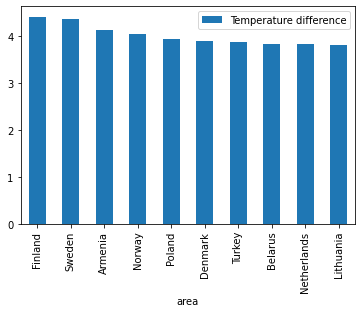

In [103]:
temp_diff = temp.copy()
continent = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/_Countries_Continents.csv", names=['area', 'continent', 'continent_code'], encoding="UTF-8")
temp_diff = pd.merge(left=continent, right=temp, on='area', how='inner')
temp_diff_europe = temp_diff.loc[(temp_diff['continent_code'] == 3) & (temp_diff['element_code'] == 7271) & (temp_diff['months_code'] == 7020)]
#temp_diff_europe.groupby('area').mean(temp_diff_europe.iloc[:,-59:])
temp_diff_europe.drop(['continent', 'continent_code', 'area_code', 'months_code', 'months', 'element_code', 'element'], axis=1, inplace=True)
temp_diff_europe.set_index('area', inplace=True)
temp_diff_europe['Temperature difference'] = temp_diff_europe.apply(lambda x: x.max() - x.min(), axis=1)
temp_diff_europe.sort_values(by='Temperature difference', ascending=False, inplace=True)
temp_diff_europe.head(10).plot(kind='bar', y='Temperature difference')
plt.show()

In [104]:
Europe = df.copy()
Europe = optional_1(Europe)
Europe_full = Europe[(Europe.Continent == 'Europe')]
Europe_c3 = Europe_full[(Europe_full.Area == 'Finland')
                            | (Europe_full.Area == 'Poland')
                            | (Europe_full.Area == 'Netherlands')]
Europe_c3 = Europe_c3[(Europe_c3.Months == 'Meteorological year')
                          & (Europe_c3.Element == 'Temperature change')]
Europe_c3

Area Continent  Continent_Code  Area_Code  Months_Code  \
2582      Finland    Europe               3         67         7020   
5064  Netherlands    Europe               3        150         7020   
5812       Poland    Europe               3        173         7020   

                   Months  Element_Code             Element Unit  Y1961  ...  \
2582  Meteorological year          7271  Temperature change   °C  1.906  ...   
5064  Meteorological year          7271  Temperature change   °C  0.851  ...   
5812  Meteorological year          7271  Temperature change   °C  1.400  ...   

      Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
2582  0.246  1.355  1.548  1.427  2.602  2.624  2.162  1.499  2.166  1.465  
5064  0.091  1.062  1.141  0.421  2.558  1.279  1.925  1.722  2.134  2.142  
5812  0.403  0.767  1.380  0.647  2.354  2.005  2.056  1.486  2.437  2.662  

[3 rows x 68 columns]

In [105]:
Europe_c3.columns = Europe_c3.columns.str.replace('Y', '')
del Europe_c3['Area_Code']
del Europe_c3['Months_Code']
del Europe_c3['Months']
del Europe_c3['Element']
del Europe_c3['Unit']
del Europe_c3['Element_Code']
del Europe_c3['Continent']
del Europe_c3['Continent_Code']
Europe_c3

Area  1961   1962   1963   1964   1965   1966  1967   1968  \
2582      Finland 1.906 -0.333 -0.400  0.336 -0.258 -1.795 1.093 -1.627   
5064  Netherlands 0.851 -0.910 -1.270 -0.336 -0.725  0.276 0.763  0.165   
5812       Poland 1.400 -0.513 -0.883 -0.717 -1.058  0.556 1.139  0.461   

       1969  ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
2582 -0.472  ... 0.246 1.355 1.548 1.427 2.602 2.624 2.162 1.499 2.166 1.465  
5064 -0.002  ... 0.091 1.062 1.141 0.421 2.558 1.279 1.925 1.722 2.134 2.142  
5812 -0.489  ... 0.403 0.767 1.380 0.647 2.354 2.005 2.056 1.486 2.437 2.662  

[3 rows x 60 columns]

In [106]:
Europe_trans = pd.melt(Europe_c3, id_vars='Area')
Europe_trans = Europe_trans.rename(columns={'variable': 'Year',
                                                'value': 'Temp'})
Europe_trans = Europe_trans.sort_values(by=['Area', 'Year'])
Europe_trans.Year = pd.to_numeric(Europe_trans.Year)
Europe_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    177 non-null    object 
 1   Year    177 non-null    int64  
 2   Temp    177 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ KB


In [107]:
Europe_trans.isna().sum()

Area    0
Year    0
Temp    0
dtype: int64

In [108]:
Europe_forest = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/forest.csv')
Europe_forest = Europe_forest[(Europe_forest.country_name == 'Finland')
                                  | (Europe_forest.country_name == 'Netherlands')
                                  | (Europe_forest.country_name == 'Poland')]
Europe_forest

country_code country_name  year  value
2304          FIN      Finland  1990 71.819
2305          FIN      Finland  1991 72.006
2306          FIN      Finland  1992 72.193
2307          FIN      Finland  1993 72.381
2308          FIN      Finland  1994 72.568
...           ...          ...   ...    ...
5788          POL       Poland  2016 30.814
5789          POL       Poland  2017 30.853
5790          POL       Poland  2018 30.895
5791          POL       Poland  2019 30.940
5792          POL       Poland  2020 30.977

[93 rows x 4 columns]

In [109]:
Europe_forest = Europe_forest.rename(columns={'year': 'Year',
                                                  'country_name': 'Area',
                                                  'value': 'Forest'})

In [110]:
del Europe_forest['country_code']
Europe_forest.Year = pd.to_numeric(Europe_forest.Year)
Europe_forest

Area  Year  Forest
2304  Finland  1990  71.819
2305  Finland  1991  72.006
2306  Finland  1992  72.193
2307  Finland  1993  72.381
2308  Finland  1994  72.568
...       ...   ...     ...
5788   Poland  2016  30.814
5789   Poland  2017  30.853
5790   Poland  2018  30.895
5791   Poland  2019  30.940
5792   Poland  2020  30.977

[93 rows x 3 columns]

In [111]:
Europe_forest.isnull().sum()

Area      0
Year      0
Forest    0
dtype: int64

In [112]:
Europe_co2 = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/co2.csv')
Europe_co2 = Europe_co2[(Europe_co2.country_name == 'Finland')
                            | (Europe_co2.country_name == 'Poland')
                            | (Europe_co2.country_name == 'Netherlands')]

In [113]:
Europe_co2 = Europe_co2.rename(columns={'year': 'Year',
                                            'country_name': 'Area',
                                            'value': 'CO2'})

In [114]:
del Europe_co2['country_code']

In [115]:
Europe_co2.isnull().sum()

Area    0
Year    0
CO2     0
dtype: int64

In [116]:
Europe_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 3992 to 10129
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    180 non-null    object 
 1   Year    180 non-null    int64  
 2   CO2     180 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [117]:
Europe_gdp = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/GDP_percapita.csv')

In [118]:
Europe_gdp = Europe_gdp.rename(columns={'Country Name': 'Area'})

In [119]:
Europe_gdp = Europe_gdp[(Europe_gdp.Area == 'Finland')
                            | (Europe_gdp.Area == 'Poland')
                            | (Europe_gdp.Area == 'Netherlands')]

In [120]:
del Europe_gdp['Code']
del Europe_gdp['Unnamed: 65']

In [121]:
Europe_gdp.isna().sum()

Area    0
1960    1
1961    1
1962    1
1963    1
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 62, dtype: int64

In [122]:
for i in range(Europe_gdp.shape[0]):
    Europe_gdp.iloc[i,-61:] = Europe_gdp.iloc[i,-61:].bfill(axis ='rows')
    Europe_gdp.iloc[i,-61:] = Europe_gdp.iloc[i,-61:].ffill(axis ='rows')

In [123]:
Europe_gdp.isna().sum()

Area    0
1960    0
1961    0
1962    0
1963    0
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 62, dtype: int64

In [124]:
Europe_gdp_trans = pd.melt(Europe_gdp, id_vars='Area')
Europe_gdp_trans = Europe_gdp_trans.rename(columns={'variable': 'Year', 'value': 'GDP_per_capita'})
Europe_gdp_trans = Europe_gdp_trans.sort_values(by=['Area', 'Year'])
Europe_gdp_trans.Year = pd.to_numeric(Europe_gdp_trans.Year)

In [125]:
Europe_urb = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/share-of-population-urban.csv')

In [126]:
Europe_urb = Europe_urb[(Europe_urb.Entity == 'Finland')
                            | (Europe_urb.Entity == 'Poland')
                            | (Europe_urb.Entity == 'Netherlands')]

In [127]:
Europe_urb = Europe_urb.rename(columns={'year': 'Year',
                                            'Entity': 'Area',
                                            'Urban population (% of total population)': 'Urban'})

In [128]:
Europe_urb.columns

Index(['Area', 'Code', 'Year', 'Urban'], dtype='object')

In [129]:
del Europe_urb['Code']

In [130]:
Europe_urb.isnull().sum()

Area     0
Year     0
Urban    0
dtype: int64

In [131]:
Europe_tf = pd.merge(Europe_trans, Europe_forest,
                       on=['Area', 'Year'], how='left')
Europe_tfc = pd.merge(Europe_tf, Europe_co2, on=[
                        'Area', 'Year'], how='left')
Europe_tfcg = pd.merge(Europe_tfc, Europe_gdp_trans, on=[
                         'Area', 'Year'], how='left')
Europe_tfcgu = pd.merge(Europe_tfcg, Europe_urb, on=[
                         'Area', 'Year'], how='left')
Europe_tfcgu

Area  Year   Temp  Forest        CO2  GDP_per_capita  Urban
0    Finland  1961  1.906     NaN  14939.358        1327.427 56.321
1    Finland  1962 -0.333     NaN  16809.528        1411.702 57.162
2    Finland  1963 -0.400     NaN  19358.093        1522.319 57.998
3    Finland  1964  0.336     NaN  22852.744        1707.504 58.832
4    Finland  1965 -0.258     NaN  25327.969        1882.087 59.658
..       ...   ...    ...     ...        ...             ...    ...
172   Poland  2015  2.005  30.765 289079.987       12578.495 60.278
173   Poland  2016  2.056  30.814 299799.988       12447.440 60.178
174   Poland  2017  1.486  30.853 312859.985       13864.682 60.105
175   Poland  2018  2.437  30.895 311910.004       15468.482 60.058
176   Poland  2019  2.662  30.940 295130.005       15732.203 60.037

[177 rows x 7 columns]

In [132]:
tfcu_Finland = Europe_tfcgu[(Europe_tfcgu.Area == 'Finland')]
tfcu_Netherlands = Europe_tfcgu[(Europe_tfcgu.Area == 'Netherlands')]
tfcu_Poland = Europe_tfcgu[(Europe_tfcgu.Area == 'Poland')]

In [133]:
from scipy.interpolate import splrep, splev

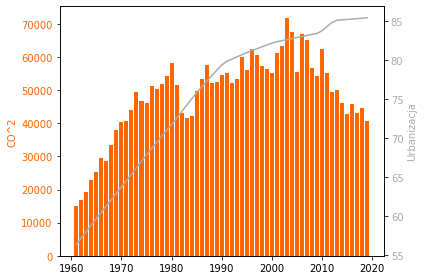

In [134]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('CO^2', color='#FF6600')
ax1.bar(tfcu_Finland.Year, tfcu_Finland.CO2, label='Finlandia', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Urbanizacja', color='#ABABAB')
ax2.plot(tfcu_Finland.Year, tfcu_Finland.Urban, label='Finlandia', color='#ABABAB')
ax2.tick_params(axis='y', labelcolor='#ABABAB')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

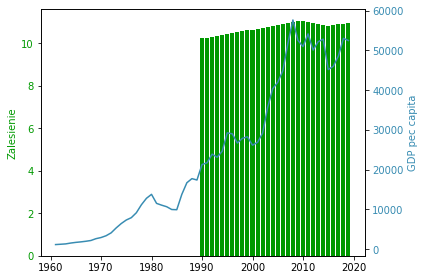

In [135]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Netherlands.Year, tfcu_Netherlands.Forest, label='Holandia', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('GDP pec capita', color='#388CB2')
bspl = splrep(tfcu_Netherlands.Year, tfcu_Netherlands.GDP_per_capita, s=20)
bspl_y = splev(tfcu_Netherlands.Year, bspl)
ax2.plot(tfcu_Netherlands.Year, bspl_y, label='Holandia', color='#388CB2')
ax2.tick_params(axis='y', labelcolor='#388CB2')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

/home/magilla/.local/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning:

The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)



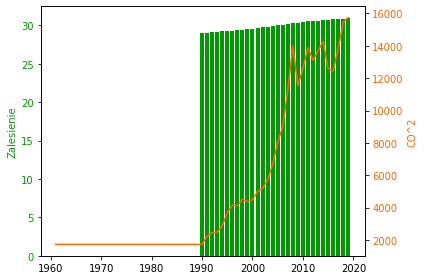

In [136]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Poland.Year, tfcu_Poland.Forest, label='Polska', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO^2', color='#FF6600')
bspl = splrep(tfcu_Poland.Year, tfcu_Poland.GDP_per_capita, s=20)
bspl_y = splev(tfcu_Poland.Year, bspl)
ax2.plot(tfcu_Poland.Year, bspl_y, label='Polska', color='#FF6600')
ax2.tick_params(axis='y', labelcolor='#FF6600')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

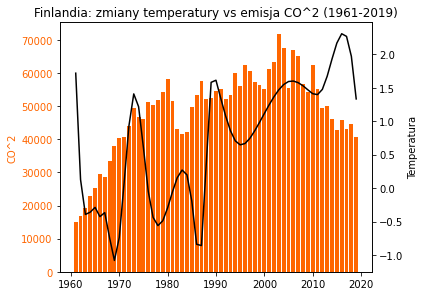

In [137]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('CO^2', color='#FF6600')
ax1.bar(tfcu_Finland.Year, tfcu_Finland.CO2, label='Finlandia', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Finland.Year, tfcu_Finland.Temp, s=20)
bspl_y = splev(tfcu_Finland.Year, bspl)
ax2.plot(tfcu_Finland.Year, bspl_y, label='Finlandia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Finlandia: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

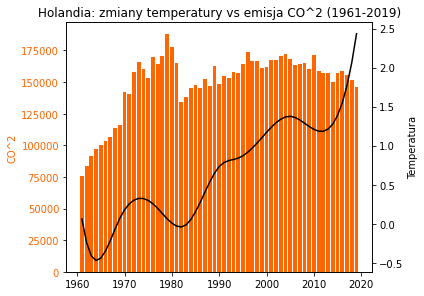

In [138]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('CO^2', color='#FF6600')
ax1.bar(tfcu_Netherlands.Year, tfcu_Netherlands.CO2, label='Holandia', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Netherlands.Year, tfcu_Netherlands.Temp, s=20)
bspl_y = splev(tfcu_Netherlands.Year, bspl)
ax2.plot(tfcu_Netherlands.Year, bspl_y, label='Holandia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Holandia: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

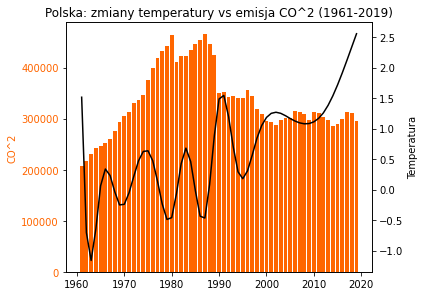

In [139]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('CO^2', color='#FF6600')
ax1.bar(tfcu_Poland.Year, tfcu_Poland.CO2, label='Polska', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Poland.Year, tfcu_Poland.Temp, s=20)
bspl_y = splev(tfcu_Poland.Year, bspl)
ax2.plot(tfcu_Poland.Year, bspl_y, label='Polska', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Polska: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

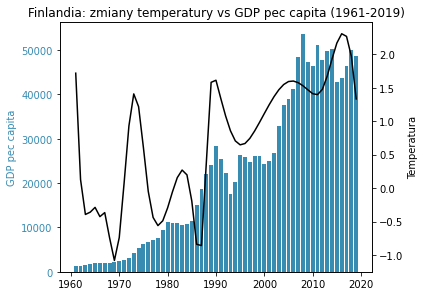

In [140]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('GDP pec capita', color='#388CB2')
ax1.bar(tfcu_Finland.Year, tfcu_Finland.GDP_per_capita, label='Finlandia', color='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Finland.Year, tfcu_Finland.Temp, s=20)
bspl_y = splev(tfcu_Finland.Year, bspl)
ax2.plot(tfcu_Finland.Year, bspl_y, label='Finlandia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Finlandia: zmiany temperatury vs GDP pec capita (1961-2019)')
plt.show()

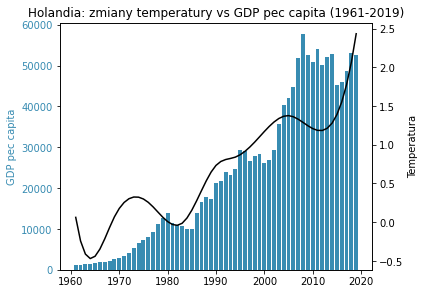

In [141]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('GDP pec capita', color='#388CB2')
ax1.bar(tfcu_Netherlands.Year, tfcu_Netherlands.GDP_per_capita, label='Holandia', color='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Netherlands.Year, tfcu_Netherlands.Temp, s=20)
bspl_y = splev(tfcu_Netherlands.Year, bspl)
ax2.plot(tfcu_Netherlands.Year, bspl_y, label='Holandia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Holandia: zmiany temperatury vs GDP pec capita (1961-2019)')
plt.show()

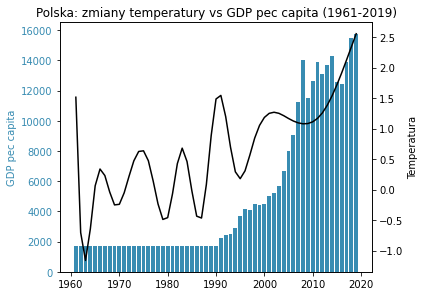

In [142]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('GDP pec capita', color='#388CB2')
ax1.bar(tfcu_Poland.Year, tfcu_Poland.GDP_per_capita, label='Polska', color='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Poland.Year, tfcu_Poland.Temp, s=20)
bspl_y = splev(tfcu_Poland.Year, bspl)
ax2.plot(tfcu_Poland.Year, bspl_y, label='Polska', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Polska: zmiany temperatury vs GDP pec capita (1961-2019)')
plt.show()

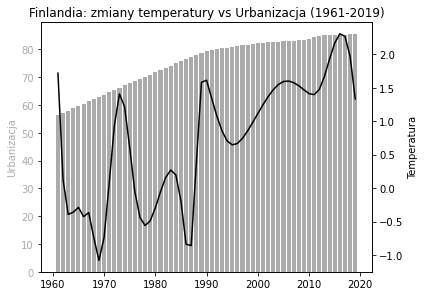

In [143]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Urbanizacja', color='#ABABAB')
ax1.bar(tfcu_Finland.Year, tfcu_Finland.Urban, label='Finlandia', color='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Finland.Year, tfcu_Finland.Temp, s=20)
bspl_y = splev(tfcu_Finland.Year, bspl)
ax2.plot(tfcu_Finland.Year, bspl_y, label='Finlandia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Finlandia: zmiany temperatury vs Urbanizacja (1961-2019)')
plt.show()

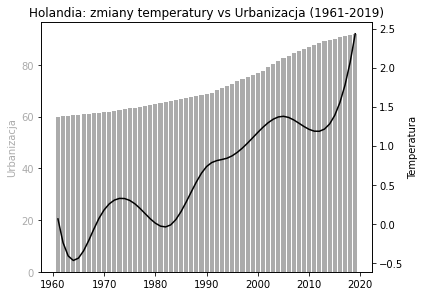

In [144]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Urbanizacja', color='#ABABAB')
ax1.bar(tfcu_Netherlands.Year, tfcu_Netherlands.Urban, label='Holandia', color='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Netherlands.Year, tfcu_Netherlands.Temp, s=20)
bspl_y = splev(tfcu_Netherlands.Year, bspl)
ax2.plot(tfcu_Netherlands.Year, bspl_y, label='Holandia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Holandia: zmiany temperatury vs Urbanizacja (1961-2019)')
plt.show()

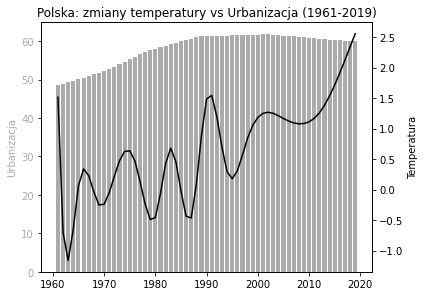

In [145]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Urbanizacja', color='#ABABAB')
ax1.bar(tfcu_Poland.Year, tfcu_Poland.Urban, label='Polska', color='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Poland.Year, tfcu_Poland.Temp, s=20)
bspl_y = splev(tfcu_Poland.Year, bspl)
ax2.plot(tfcu_Poland.Year, bspl_y, label='Polska', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Polska: zmiany temperatury vs Urbanizacja (1961-2019)')
plt.show()

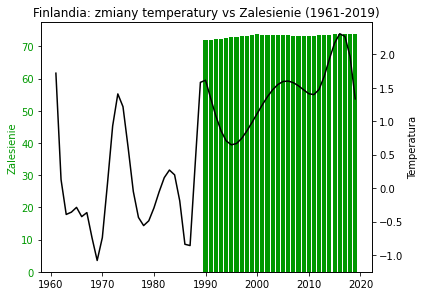

In [146]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Finland.Year, tfcu_Finland.Forest, label='Finlandia', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Finland.Year, tfcu_Finland.Temp, s=20)
bspl_y = splev(tfcu_Finland.Year, bspl)
ax2.plot(tfcu_Finland.Year, bspl_y, label='Finlandia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Finlandia: zmiany temperatury vs Zalesienie (1961-2019)')
plt.show()

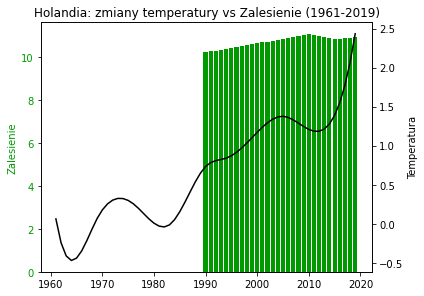

In [147]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Netherlands.Year, tfcu_Netherlands.Forest, label='Holandia', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Netherlands.Year, tfcu_Netherlands.Temp, s=20)
bspl_y = splev(tfcu_Netherlands.Year, bspl)
ax2.plot(tfcu_Netherlands.Year, bspl_y, label='Holandia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Holandia: zmiany temperatury vs Zalesienie (1961-2019)')
plt.show()

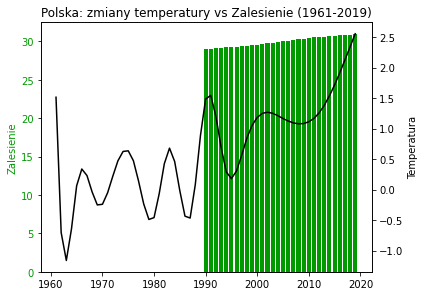

In [148]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Poland.Year, tfcu_Poland.Forest, label='Polska', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Poland.Year, tfcu_Poland.Temp, s=20)
bspl_y = splev(tfcu_Poland.Year, bspl)
ax2.plot(tfcu_Poland.Year, bspl_y, label='Polska', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Polska: zmiany temperatury vs Zalesienie (1961-2019)')
plt.show()

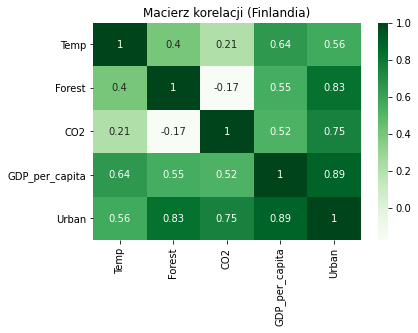

In [149]:
corr_Finland = Europe_tfcgu[(Europe_tfcgu.Area == 'Finland')]
del corr_Finland['Area']
del corr_Finland['Year']
corr_Finland = corr_Finland.corr()
sns.heatmap(corr_Finland, annot=True, cmap = 'Greens')
plt.title('Macierz korelacji (Finlandia)')
plt.show()

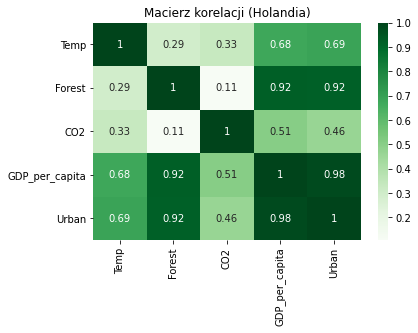

In [150]:
corr_Netherlands = Europe_tfcgu[(Europe_tfcgu.Area == 'Netherlands')]
del corr_Netherlands['Area']
del corr_Netherlands['Year']
corr_Netherlands = corr_Netherlands.corr()
sns.heatmap(corr_Netherlands, annot=True, cmap = 'Greens')
plt.title('Macierz korelacji (Holandia)')
plt.show()

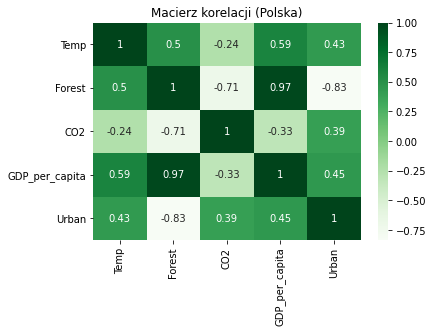

In [151]:
corr_Poland = Europe_tfcgu[(Europe_tfcgu.Area == 'Poland')]
del corr_Poland['Area']
del corr_Poland['Year']
corr_Poland = corr_Poland.corr()
sns.heatmap(corr_Poland, annot=True, cmap = 'Greens')
plt.title('Macierz korelacji (Polska)')
plt.show()

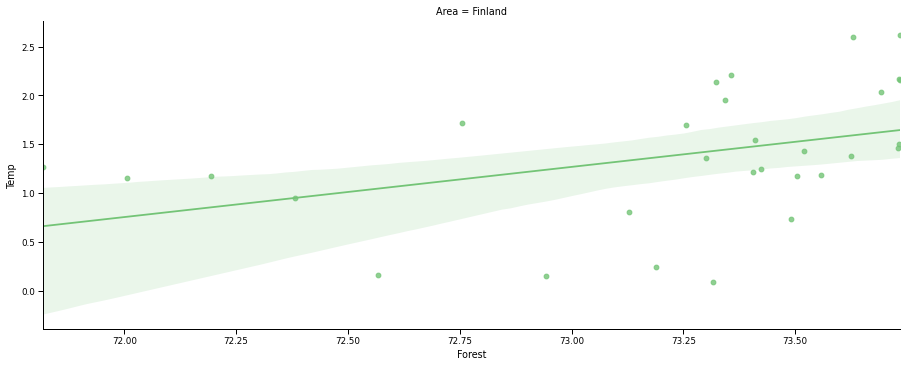

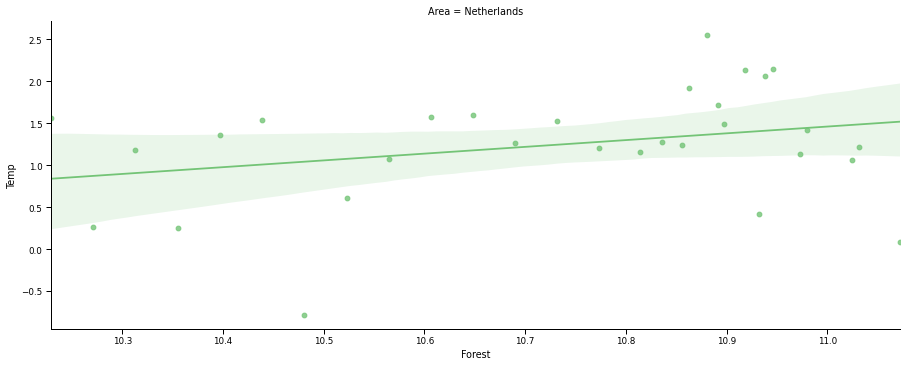

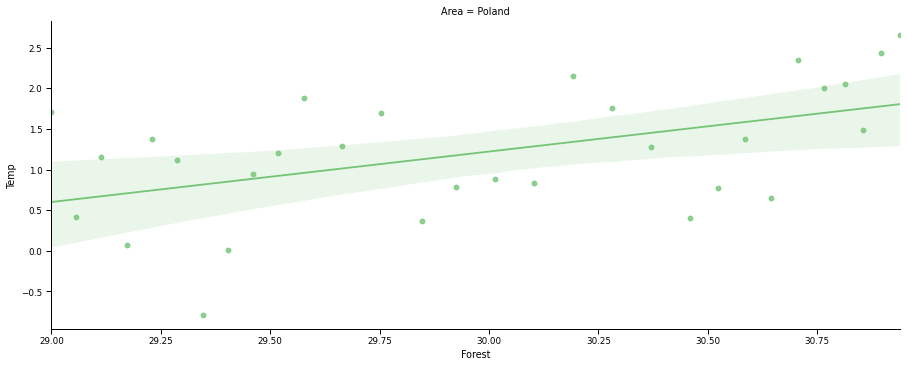

In [152]:
sns.set_context('paper')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Finland'))],
            x="Forest",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Netherlands'))],
            x="Forest",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Poland'))],
            x="Forest",
            y="Temp",
            aspect=2.5,
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')

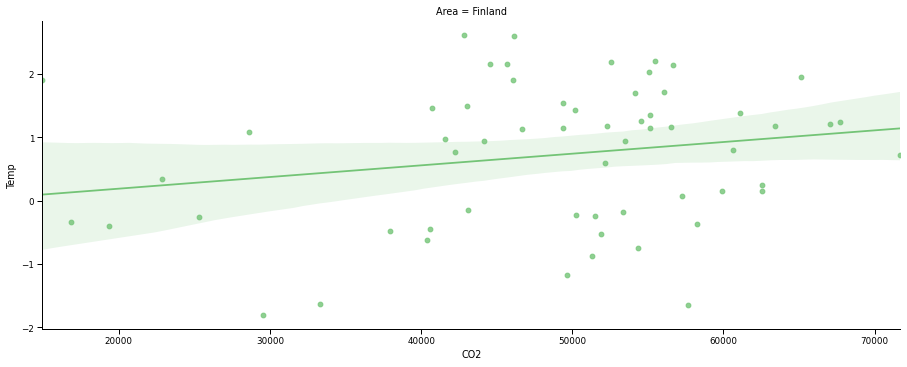

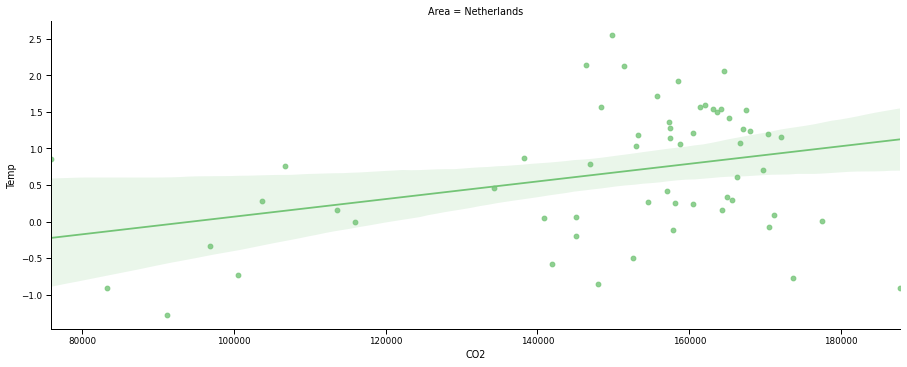

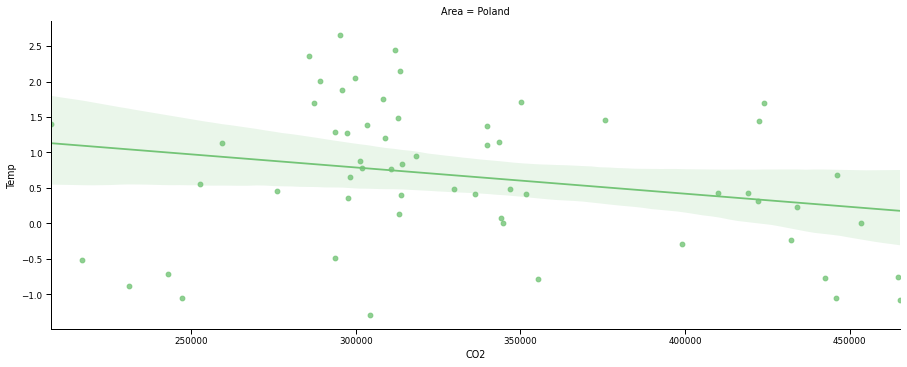

In [153]:
sns.set_context('paper')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Finland'))],
            x="CO2",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Netherlands'))],
            x="CO2",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Poland'))],
            x="CO2",
            y="Temp",
            aspect=2.5,
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')

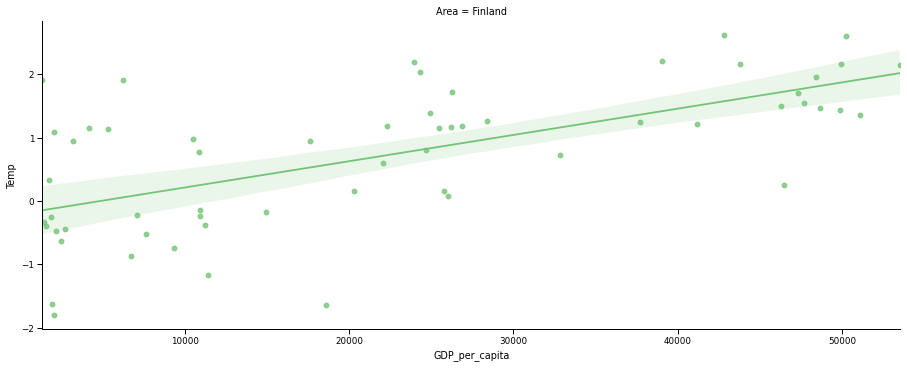

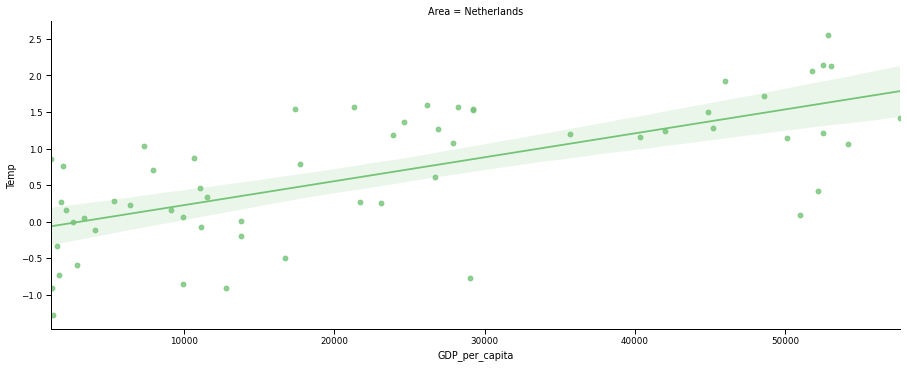

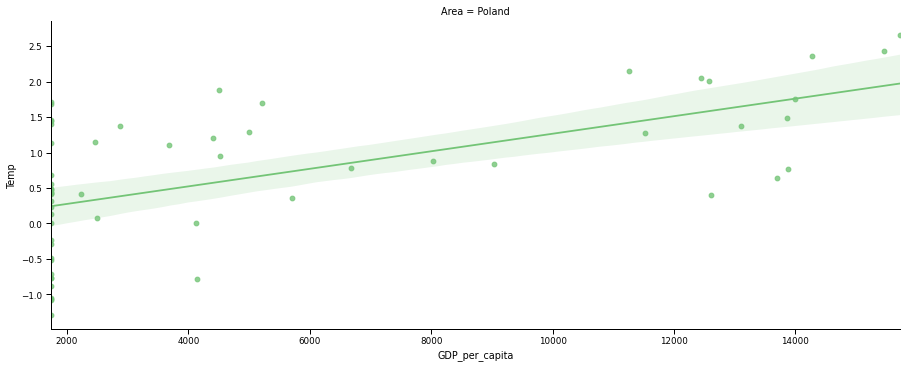

In [154]:
sns.set_context('paper')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Finland'))],
            x="GDP_per_capita",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Netherlands'))],
            x="GDP_per_capita",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Poland'))],
            x="GDP_per_capita",
            y="Temp",
            aspect=2.5,
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')

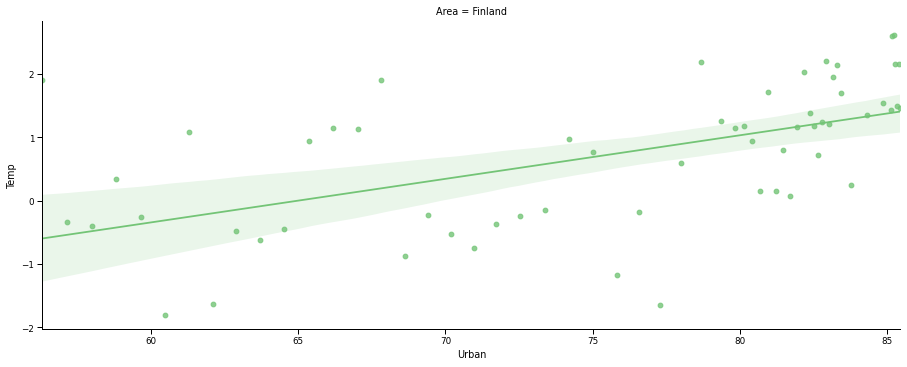

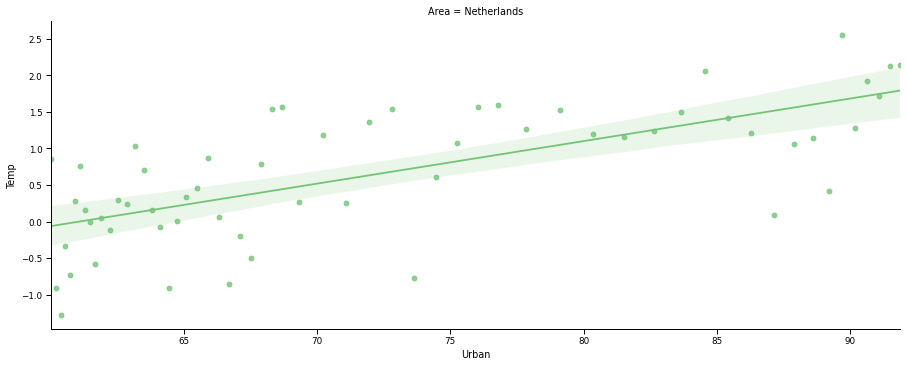

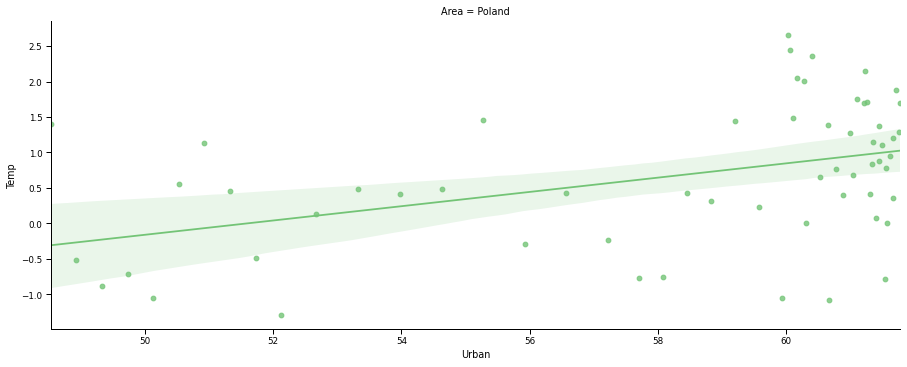

In [155]:
sns.set_context('paper')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Finland'))],
            x="Urban",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Netherlands'))],
            x="Urban",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Poland'))],
            x="Urban",
            y="Temp",
            aspect=2.5,
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')

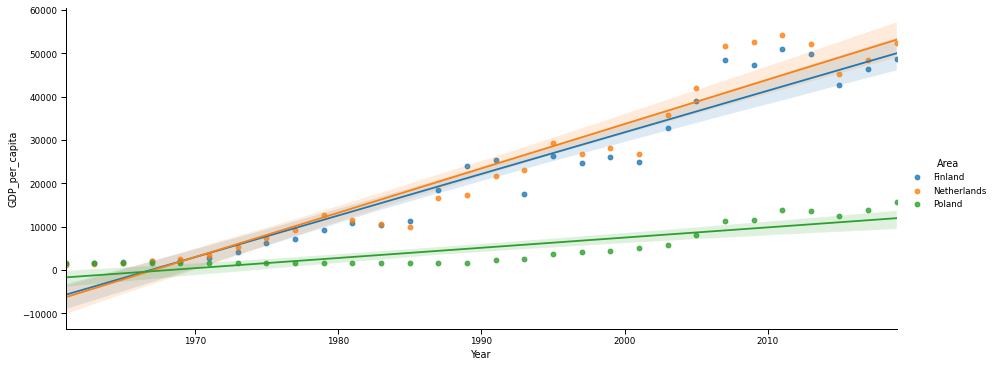

In [156]:
sns.set_context('paper')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Finland')
                                      | (Europe_tfcgu['Area'] == 'Netherlands')
                                      | (Europe_tfcgu['Area'] == 'Poland')) & (Europe_tfcgu['Year'])],
           x="Year",
           y="GDP_per_capita",
           aspect=2.5,
           hue='Area')
plt.show()

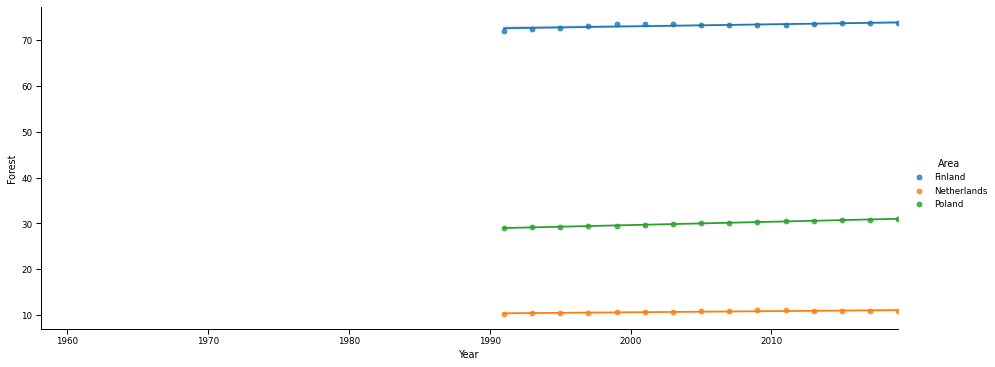

In [157]:
sns.set_context('paper')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Finland')
                                      | (Europe_tfcgu['Area'] == 'Netherlands')
                                      | (Europe_tfcgu['Area'] == 'Poland')) & (Europe_tfcgu['Year'])],
           x="Year",
           y="Forest",
           aspect=2.5,
           hue='Area')
plt.show()

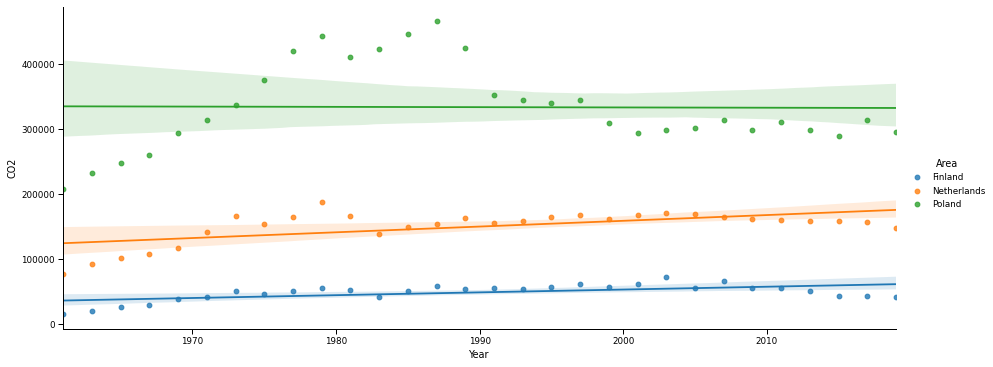

In [158]:
sns.set_context('paper')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Finland')
                                      | (Europe_tfcgu['Area'] == 'Netherlands')
                                      | (Europe_tfcgu['Area'] == 'Poland')) & (Europe_tfcgu['Year'])],
           x="Year",
           y="CO2",
           aspect=2.5,
           hue='Area')
plt.show()

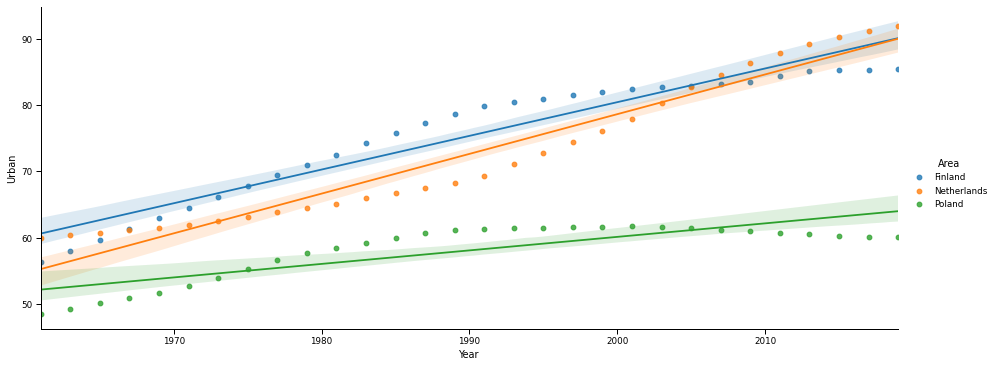

In [159]:
sns.set_context('paper')
sns.lmplot(data=Europe_tfcgu[((Europe_tfcgu['Area'] == 'Finland')
                                      | (Europe_tfcgu['Area'] == 'Netherlands')
                                      | (Europe_tfcgu['Area'] == 'Poland')) & (Europe_tfcgu['Year'])],
           x="Year",
           y="Urban", 
           aspect=2.5,
           hue='Area')
plt.show()

In [160]:
SAmerica = df.copy()
SAmerica = optional_1(SAmerica)
SAmerica_full = SAmerica[(SAmerica.Continent == 'Shouth America')]
SAmerica_c3 = SAmerica_full[(SAmerica_full.Area == 'Brazil')
                            | (SAmerica_full.Area == 'Argentina')
                            | (SAmerica_full.Area == 'Chile')]
SAmerica_c3 = SAmerica_c3[(SAmerica_c3.Months == 'Meteorological year')
                          & (SAmerica_c3.Element == 'Temperature change')]
#Europe_c3

In [161]:
SAmerica_c3.columns = SAmerica_c3.columns.str.replace('Y', '')
del SAmerica_c3['Area_Code']
del SAmerica_c3['Months_Code']
del SAmerica_c3['Months']
del SAmerica_c3['Element']
del SAmerica_c3['Unit']
del SAmerica_c3['Element_Code']
del SAmerica_c3['Continent']
del SAmerica_c3['Continent_Code']

In [162]:
SAmerica_trans = pd.melt(SAmerica_c3, id_vars='Area')
SAmerica_trans = SAmerica_trans.rename(columns={'variable': 'Year',
                                                'value': 'Temp'})
SAmerica_trans = SAmerica_trans.sort_values(by=['Area', 'Year'])
SAmerica_trans.Year = pd.to_numeric(SAmerica_trans.Year)
SAmerica_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    177 non-null    object 
 1   Year    177 non-null    int64  
 2   Temp    177 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ KB


In [163]:
SAmerica_trans.isna().sum()

Area    0
Year    0
Temp    0
dtype: int64

In [164]:
SAmerica_forest = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/forest.csv')
SAmerica_forest = SAmerica_forest[(SAmerica_forest.country_name == 'Brazil')
                                  | (SAmerica_forest.country_name == 'Argentina')
                                  | (SAmerica_forest.country_name == 'Chile')]

In [165]:
SAmerica_forest = SAmerica_forest.rename(columns={'year': 'Year',
                                                  'country_name': 'Area',
                                                  'value': 'Forest'})

In [166]:
del SAmerica_forest['country_code']
SAmerica_forest.Year = pd.to_numeric(SAmerica_forest.Year)


In [167]:
SAmerica_forest.isnull().sum()

Area      0
Year      0
Forest    0
dtype: int64

In [168]:
SAmerica_co2 = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/co2.csv')
SAmerica_co2 = SAmerica_co2[(SAmerica_co2.country_name == 'Brazil')
                            | (SAmerica_co2.country_name == 'Argentina')
                            | (SAmerica_co2.country_name == 'Chile')]

In [169]:
SAmerica_co2 = SAmerica_co2.rename(columns={'year': 'Year',
                                            'country_name': 'Area',
                                            'value': 'CO2'})

In [170]:
del SAmerica_co2['country_code']

In [171]:
SAmerica_co2.isnull().sum()

Area    0
Year    0
CO2     0
dtype: int64

In [172]:
SAmerica_gdp = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/GDP_percapita.csv')

In [173]:
SAmerica_gdp = SAmerica_gdp.rename(columns={'Country Name': 'Area'})

In [174]:
SAmerica_gdp = SAmerica_gdp[(SAmerica_gdp.Area == 'Brazil')
                            | (SAmerica_gdp.Area == 'Argentina')
                            | (SAmerica_gdp.Area == 'Chile')]

In [175]:
del SAmerica_gdp['Code']
del SAmerica_gdp['Unnamed: 65']

In [176]:
SAmerica_gdp.isna().sum()

Area    0
1960    2
1961    1
1962    0
1963    0
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 62, dtype: int64

In [177]:
for i in range(SAmerica_gdp.shape[0]):
    SAmerica_gdp.iloc[i,-61:] = SAmerica_gdp.iloc[i,-61:].bfill(axis ='rows')
    SAmerica_gdp.iloc[i,-61:] = SAmerica_gdp.iloc[i,-61:].ffill(axis ='rows')

In [178]:
SAmerica_gdp.isna().sum()

Area    0
1960    0
1961    0
1962    0
1963    0
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 62, dtype: int64

In [179]:
SAmerica_gdp_trans = pd.melt(SAmerica_gdp, id_vars='Area')
SAmerica_gdp_trans = SAmerica_gdp_trans.rename(columns={'variable': 'Year', 'value': 'GDP_per_capita'})
SAmerica_gdp_trans = SAmerica_gdp_trans.sort_values(by=['Area', 'Year'])
SAmerica_gdp_trans.Year = pd.to_numeric(SAmerica_gdp_trans.Year)

In [180]:
SAmerica_urb = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/share-of-population-urban.csv')

In [181]:
SAmerica_urb = SAmerica_urb[(SAmerica_urb.Entity == 'Brazil')
                            | (SAmerica_urb.Entity == 'Argentina')
                            | (SAmerica_urb.Entity == 'Chile')]

In [182]:
SAmerica_urb = SAmerica_urb.rename(columns={'year': 'Year',
                                            'Entity': 'Area',
                                            'Urban population (% of total population)': 'Urban'})

In [183]:
SAmerica_urb.columns

Index(['Area', 'Code', 'Year', 'Urban'], dtype='object')

In [184]:
del SAmerica_urb['Code']

In [185]:
SAmerica_urb.isnull().sum()

Area     0
Year     0
Urban    0
dtype: int64

In [186]:
SAmerica_tf = pd.merge(SAmerica_trans, SAmerica_forest,
                       on=['Area', 'Year'], how='left')
SAmerica_tfc = pd.merge(SAmerica_tf, SAmerica_co2, on=[
                        'Area', 'Year'], how='left')
SAmerica_tfcg = pd.merge(SAmerica_tfc, SAmerica_gdp_trans, on=[
                         'Area', 'Year'], how='left')
SAmerica_tfcgu = pd.merge(SAmerica_tfcg, SAmerica_urb, on=[
                         'Area', 'Year'], how='left')
SAmerica_tfcgu

Area  Year   Temp  Forest       CO2  GDP_per_capita  Urban
0    Argentina  1961  0.129     NaN 51180.319        1155.891 74.217
1    Argentina  1962 -0.058     NaN 53695.881        1155.891 74.767
2    Argentina  1963  0.146     NaN 50083.886         850.305 75.309
3    Argentina  1964 -0.368     NaN 55727.399        1173.238 75.844
4    Argentina  1965  0.063     NaN 58866.351        1279.114 76.369
..         ...   ...    ...     ...       ...             ...    ...
172      Chile  2015  0.701  23.666 82230.003       13574.169 87.360
173      Chile  2016  0.836  23.831 86489.998       13753.592 87.422
174      Chile  2017  0.680  23.996 87070.000       14998.817 87.490
175      Chile  2018  0.332  24.162 86610.001       15888.144 87.564
176      Chile  2019  0.460  24.327 91370.003       14741.714 87.643

[177 rows x 7 columns]

In [187]:
tfcu_Argentina = SAmerica_tfcgu[(SAmerica_tfcgu.Area == 'Argentina')]
tfcu_Brazil = SAmerica_tfcgu[(SAmerica_tfcgu.Area == 'Brazil')]
tfcu_Chile = SAmerica_tfcgu[(SAmerica_tfcgu.Area == 'Chile')]

In [188]:
from scipy.interpolate import splrep, splev

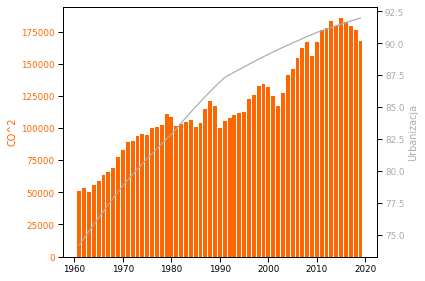

In [189]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('CO^2', color='#FF6600')
ax1.bar(tfcu_Argentina.Year, tfcu_Argentina.CO2, label='Argentyna', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Urbanizacja', color='#ABABAB')
ax2.plot(tfcu_Argentina.Year, tfcu_Argentina.Urban, label='Argentyna', color='#ABABAB')
ax2.tick_params(axis='y', labelcolor='#ABABAB')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

/home/magilla/.local/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning:

The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)



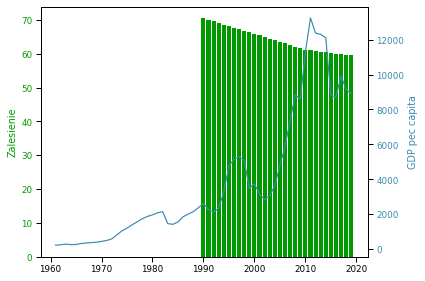

In [190]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Brazil.Year, tfcu_Brazil.Forest, label='Brazylia', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('GDP pec capita', color='#388CB2')
bspl = splrep(tfcu_Brazil.Year, tfcu_Brazil.GDP_per_capita, s=20)
bspl_y = splev(tfcu_Brazil.Year, bspl)
ax2.plot(tfcu_Brazil.Year, bspl_y, label='Brazylia', color='#388CB2')
ax2.tick_params(axis='y', labelcolor='#388CB2')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

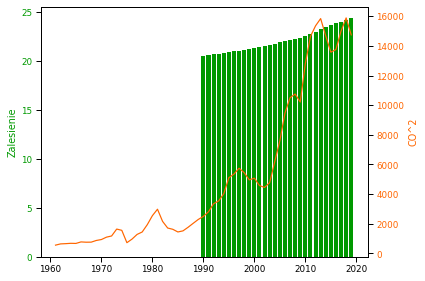

In [191]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Chile.Year, tfcu_Chile.Forest, label='Chile', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO^2', color='#FF6600')
bspl = splrep(tfcu_Chile.Year, tfcu_Chile.GDP_per_capita, s=20)
bspl_y = splev(tfcu_Chile.Year, bspl)
ax2.plot(tfcu_Chile.Year, bspl_y, label='Chile', color='#FF6600')
ax2.tick_params(axis='y', labelcolor='#FF6600')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

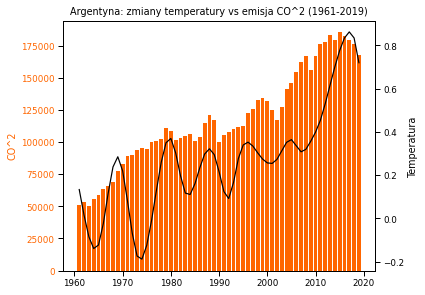

In [192]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('CO^2', color='#FF6600')
ax1.bar(tfcu_Argentina.Year, tfcu_Argentina.CO2, label='Argentyna', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Argentina.Year, tfcu_Argentina.Temp, s=3)
bspl_y = splev(tfcu_Argentina.Year, bspl)
ax2.plot(tfcu_Argentina.Year, bspl_y, label='Argentyna', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Argentyna: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

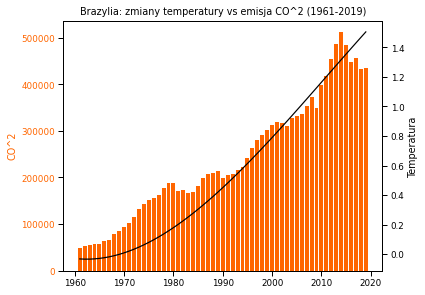

In [193]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('CO^2', color='#FF6600')
ax1.bar(tfcu_Brazil.Year, tfcu_Brazil.CO2, label='Brazylia', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Brazil.Year, tfcu_Brazil.Temp, s=3)
bspl_y = splev(tfcu_Brazil.Year, bspl)
ax2.plot(tfcu_Brazil.Year, bspl_y, label='Brazylia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Brazylia: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

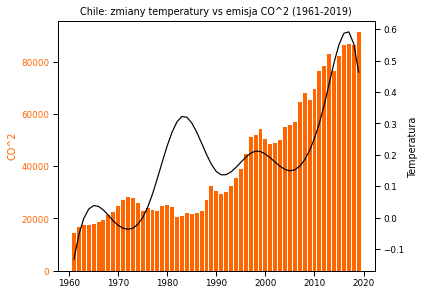

In [194]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('CO^2', color='#FF6600')
ax1.bar(tfcu_Chile.Year, tfcu_Chile.CO2, label='Chile', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Chile.Year, tfcu_Chile.Temp, s=3)
bspl_y = splev(tfcu_Chile.Year, bspl)
ax2.plot(tfcu_Chile.Year, bspl_y, label='Chile', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Chile: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

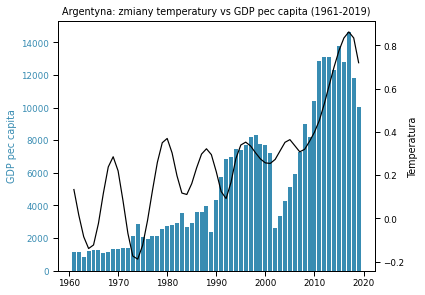

In [195]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('GDP pec capita', color='#388CB2')
ax1.bar(tfcu_Argentina.Year, tfcu_Argentina.GDP_per_capita, label='Argentyna', color='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Argentina.Year, tfcu_Argentina.Temp, s=3)
bspl_y = splev(tfcu_Argentina.Year, bspl)
ax2.plot(tfcu_Argentina.Year, bspl_y, label='Argentyna', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Argentyna: zmiany temperatury vs GDP pec capita (1961-2019)')
plt.show()

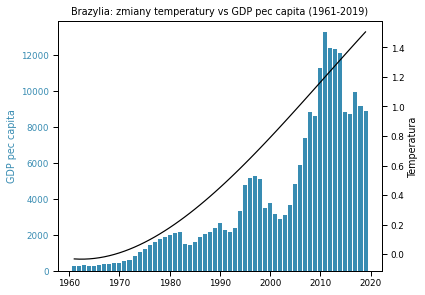

In [196]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('GDP pec capita', color='#388CB2')
ax1.bar(tfcu_Brazil.Year, tfcu_Brazil.GDP_per_capita, label='Brazylia', color='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Brazil.Year, tfcu_Brazil.Temp, s=3)
bspl_y = splev(tfcu_Brazil.Year, bspl)
ax2.plot(tfcu_Brazil.Year, bspl_y, label='Brazylia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Brazylia: zmiany temperatury vs GDP pec capita (1961-2019)')
plt.show()

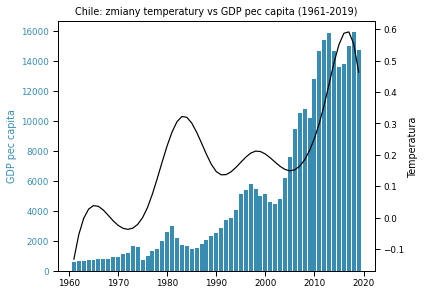

In [197]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('GDP pec capita', color='#388CB2')
ax1.bar(tfcu_Chile.Year, tfcu_Chile.GDP_per_capita, label='Chile', color='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Chile.Year, tfcu_Chile.Temp, s=3)
bspl_y = splev(tfcu_Chile.Year, bspl)
ax2.plot(tfcu_Chile.Year, bspl_y, label='Chile', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Chile: zmiany temperatury vs GDP pec capita (1961-2019)')
plt.show()

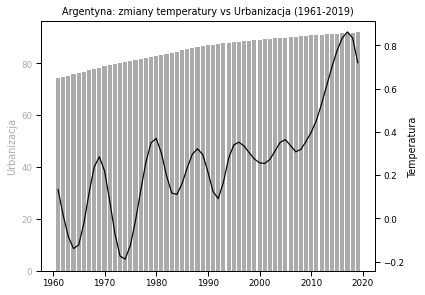

In [198]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Urbanizacja', color='#ABABAB')
ax1.bar(tfcu_Argentina.Year, tfcu_Argentina.Urban, label='Argentyna', color='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Argentina.Year, tfcu_Argentina.Temp, s=3)
bspl_y = splev(tfcu_Argentina.Year, bspl)
ax2.plot(tfcu_Argentina.Year, bspl_y, label='Argentyna', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Argentyna: zmiany temperatury vs Urbanizacja (1961-2019)')
plt.show()

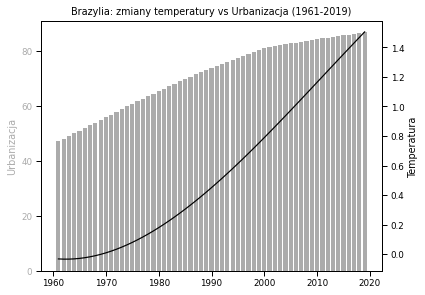

In [199]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Urbanizacja', color='#ABABAB')
ax1.bar(tfcu_Brazil.Year, tfcu_Brazil.Urban, label='Brazylia', color='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Brazil.Year, tfcu_Brazil.Temp, s=3)
bspl_y = splev(tfcu_Brazil.Year, bspl)
ax2.plot(tfcu_Brazil.Year, bspl_y, label='Brazylia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Brazylia: zmiany temperatury vs Urbanizacja (1961-2019)')
plt.show()

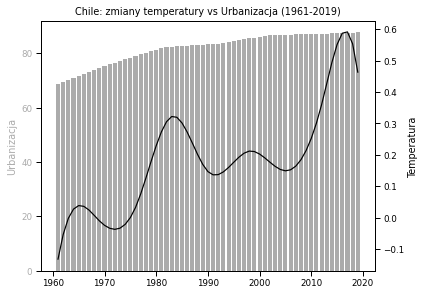

In [200]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Urbanizacja', color='#ABABAB')
ax1.bar(tfcu_Chile.Year, tfcu_Chile.Urban, label='Chile', color='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Chile.Year, tfcu_Chile.Temp, s=3)
bspl_y = splev(tfcu_Chile.Year, bspl)
ax2.plot(tfcu_Chile.Year, bspl_y, label='Chile', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Chile: zmiany temperatury vs Urbanizacja (1961-2019)')
plt.show()

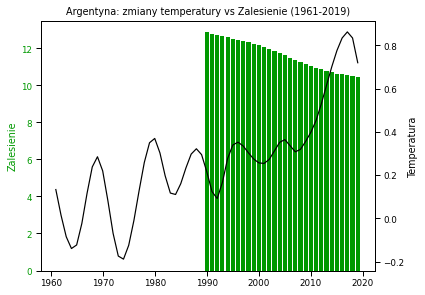

In [201]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Argentina.Year, tfcu_Argentina.Forest, label='Argentyna', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Argentina.Year, tfcu_Argentina.Temp, s=3)
bspl_y = splev(tfcu_Argentina.Year, bspl)
ax2.plot(tfcu_Argentina.Year, bspl_y, label='Argentyna', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Argentyna: zmiany temperatury vs Zalesienie (1961-2019)')
plt.show()

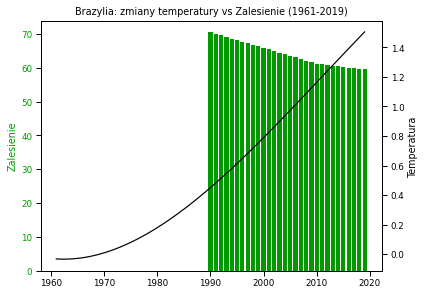

In [202]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Brazil.Year, tfcu_Brazil.Forest, label='Brazylia', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Brazil.Year, tfcu_Brazil.Temp, s=3)
bspl_y = splev(tfcu_Brazil.Year, bspl)
ax2.plot(tfcu_Brazil.Year, bspl_y, label='Brazylia', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Brazylia: zmiany temperatury vs Zalesienie (1961-2019)')
plt.show()

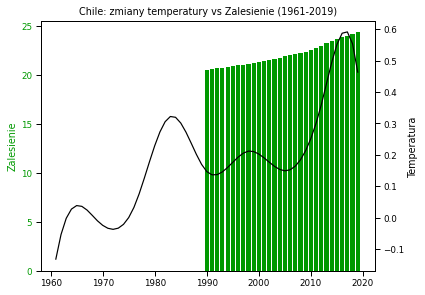

In [203]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie', color='#009900')
ax1.bar(tfcu_Chile.Year, tfcu_Chile.Forest, label='Chile', color='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperatura', color='#000000')
bspl = splrep(tfcu_Chile.Year, tfcu_Chile.Temp, s=3)
bspl_y = splev(tfcu_Chile.Year, bspl)
ax2.plot(tfcu_Chile.Year, bspl_y, label='Chile', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Chile: zmiany temperatury vs Zalesienie (1961-2019)')
plt.show()

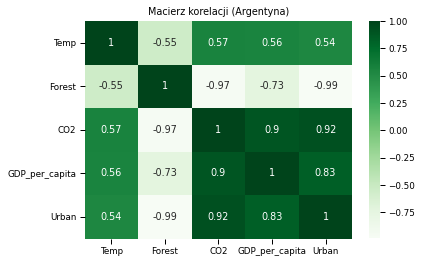

In [204]:
corr_Argentina = SAmerica_tfcgu[(SAmerica_tfcgu.Area == 'Argentina')]
del corr_Argentina['Area']
del corr_Argentina['Year']
corr_Argentina = corr_Argentina.corr()
sns.heatmap(corr_Argentina, annot=True, cmap = 'Greens')
plt.title('Macierz korelacji (Argentyna)')
plt.show()

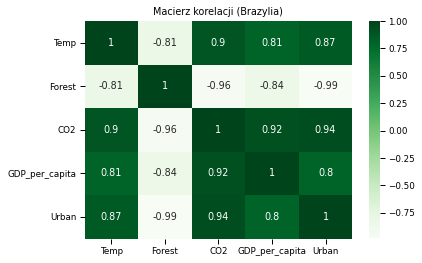

In [205]:
corr_Brazil = SAmerica_tfcgu[(SAmerica_tfcgu.Area == 'Brazil')]
del corr_Brazil['Area']
del corr_Brazil['Year']
corr_Brazil = corr_Brazil.corr()
sns.heatmap(corr_Brazil, annot=True, cmap = 'Greens')
plt.title('Macierz korelacji (Brazylia)')
plt.show()

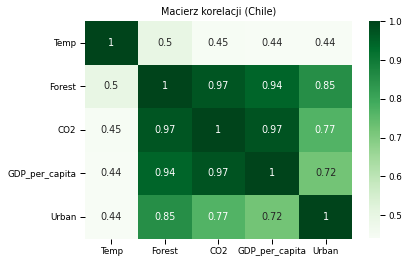

In [206]:
corr_Chile = SAmerica_tfcgu[(SAmerica_tfcgu.Area == 'Chile')]
del corr_Chile['Area']
del corr_Chile['Year']
corr_Chile = corr_Chile.corr()
sns.heatmap(corr_Chile, annot=True, cmap = 'Greens')
plt.title('Macierz korelacji (Chile)')
plt.show()

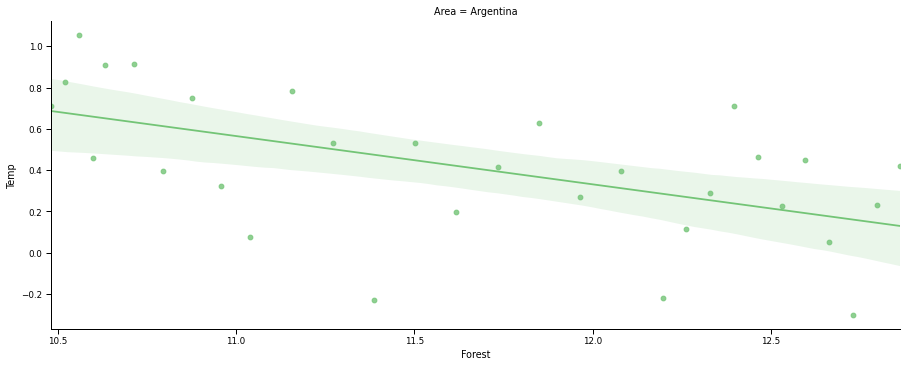

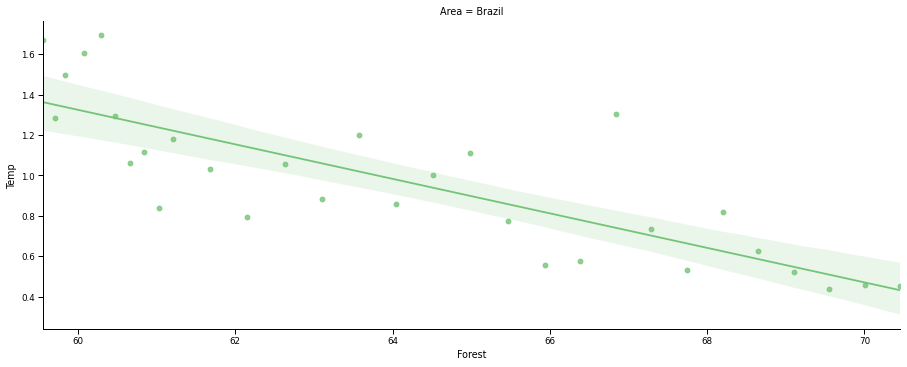

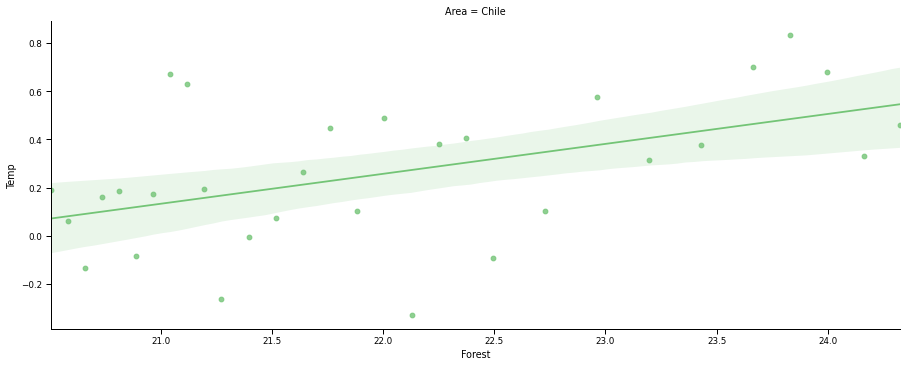

In [207]:
sns.set_context('paper')
sns.lmplot(data=SAmerica_tfcgu[((SAmerica_tfcgu['Area'] == 'Argentina'))],
            x="Forest",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=SAmerica_tfcgu[((SAmerica_tfcgu['Area'] == 'Brazil'))],
            x="Forest",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=SAmerica_tfcgu[((SAmerica_tfcgu['Area'] == 'Chile'))],
            x="Forest",
            y="Temp",
            aspect=2.5,
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')

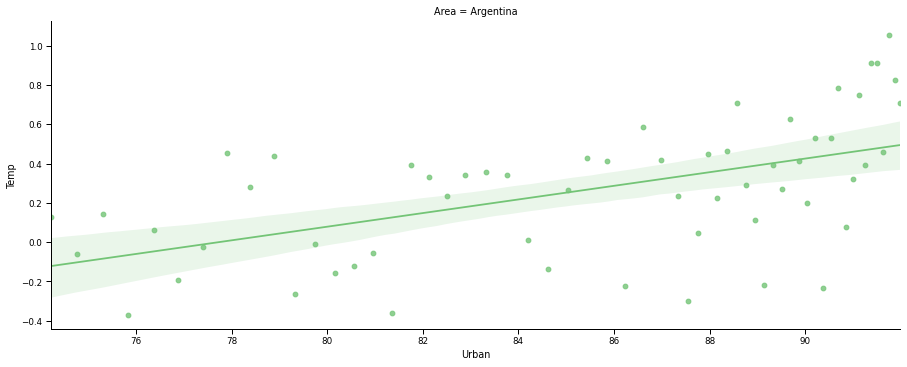

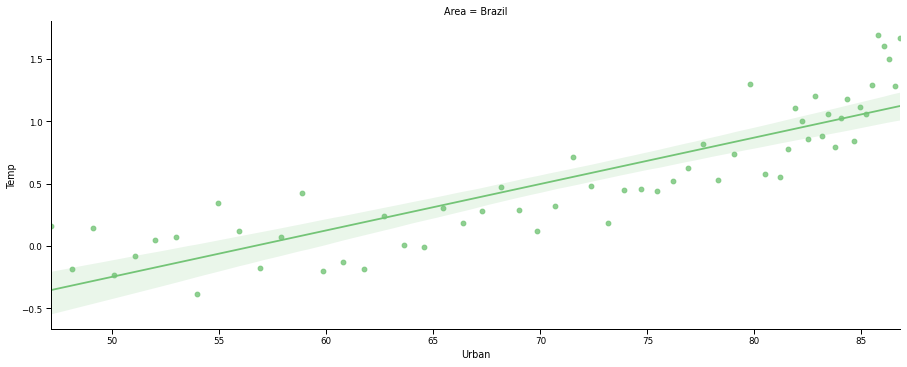

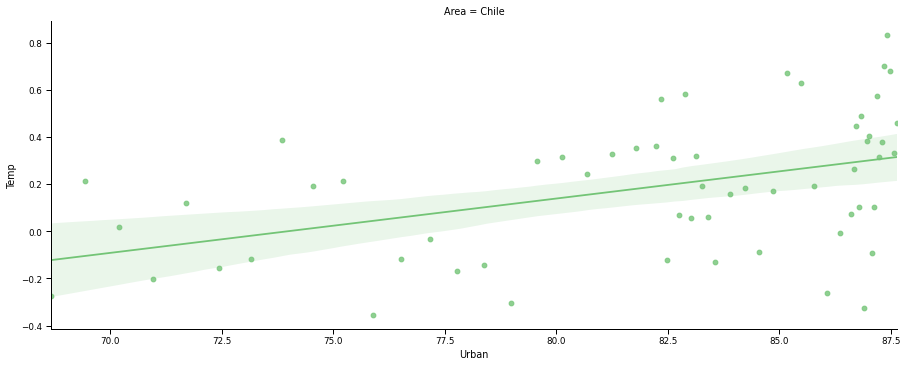

In [208]:
sns.set_context('paper')
sns.lmplot(data=SAmerica_tfcgu[((SAmerica_tfcgu['Area'] == 'Argentina'))],
            x="Urban",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=SAmerica_tfcgu[((SAmerica_tfcgu['Area'] == 'Brazil'))],
            x="Urban",
            y="Temp",
            aspect=2.5,
            col='Area',
            hue = 'Area',
            palette = 'Greens')
sns.lmplot(data=SAmerica_tfcgu[((SAmerica_tfcgu['Area'] == 'Chile'))],
            x="Urban",
            y="Temp",
            aspect=2.5,
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')

#### NORTHERN & CENTRAL AMERICA

In[ ]:

Making individual variable for group purpose working

DataFrame with 5 countries from America (Northern & Central

In[40]:

In [209]:
NAmerica = df.copy()
NAmerica = optional_1(NAmerica)
NAmerica_full = NAmerica[(NAmerica.Continent == 'North America')]
NAmerica_c3 = NAmerica_full[(NAmerica_full.Area == 'Canada')
                            | (NAmerica_full.Area == 'United States of America')
                            | (NAmerica_full.Area == 'Dominican Republic')]
NAmerica_c3 = NAmerica_c3[(NAmerica_c3.Months == 'Meteorological year')
                          & (NAmerica_c3.Element == 'Temperature change')]
NAmerica_c3

Area      Continent  Continent_Code  Area_Code  \
1290                    Canada  North America               4         33   
2140        Dominican Republic  North America               4         56   
7750  United States of America  North America               4        231   

      Months_Code               Months  Element_Code             Element Unit  \
1290         7020  Meteorological year          7271  Temperature change   °C   
2140         7020  Meteorological year          7271  Temperature change   °C   
7750         7020  Meteorological year          7271  Temperature change   °C   

      Y1961  ...  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  \
1290  0.045  ...  2.917  1.444  2.140  1.186  0.273  1.198  2.345  1.451   
2140 -0.040  ...  1.401  0.677  0.867  1.156  1.095  1.378  1.284  1.112   
7750  0.000  ...  0.679  0.530  1.437  0.597  0.463  1.508  2.197  1.408   

      Y2018  Y2019  
1290  0.502  1.315  
2140  1.161  1.413  
7750  1.244  1.011  

[3 rows x 68 columns]

Inp[]:<br><br>
reparing data

In[41]:

In [210]:
NAmerica_c3.columns = NAmerica_c3.columns.str.replace('Y', '')
del NAmerica_c3['Area_Code']
del NAmerica_c3['Months_Code']
del NAmerica_c3['Months']
del NAmerica_c3['Element']
del NAmerica_c3['Unit']
del NAmerica_c3['Element_Code']
del NAmerica_c3['Continent']
del NAmerica_c3['Continent_Code']
NAmerica_c3

Area   1961   1962   1963   1964   1965   1966  \
1290                    Canada  0.045 -0.124  0.330 -0.304 -0.872 -0.156   
2140        Dominican Republic -0.040 -0.091 -0.021  0.138 -0.350 -0.064   
7750  United States of America  0.000 -0.023  0.418 -0.285 -0.358 -0.213   

       1967   1968   1969  ...  2010  2011  2012  2013  2014  2015  2016  \
1290 -0.451  0.482 -0.001  ... 2.917 1.444 2.140 1.186 0.273 1.198 2.345   
2140 -0.221 -0.191  0.275  ... 1.401 0.677 0.867 1.156 1.095 1.378 1.284   
7750  0.073 -0.082 -0.274  ... 0.679 0.530 1.437 0.597 0.463 1.508 2.197   

      2017  2018  2019  
1290 1.451 0.502 1.315  
2140 1.112 1.161 1.413  
7750 1.408 1.244 1.011  

[3 rows x 60 columns]

In[]:<br><br>
Transformation table

In[42]:

In [211]:
NAmerica_trans = pd.melt(NAmerica_c3, id_vars='Area')
NAmerica_trans = NAmerica_trans.rename(columns={'variable': 'Year',
                                                'value': 'Temp'})
NAmerica_trans = NAmerica_trans.sort_values(by=['Area', 'Year'])
NAmerica_trans.Year = pd.to_numeric(NAmerica_trans.Year)
NAmerica_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    177 non-null    object 
 1   Year    177 non-null    int64  
 2   Temp    177 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ KB


In[]:<br><br>
DataFrame with Forests

In[43]:

In [212]:
NAmerica_forest = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/forest.csv')
NAmerica_forest = NAmerica_forest[(NAmerica_forest.country_name == 'Canada')
                                  | (NAmerica_forest.country_name == 'United States')
                                  | (NAmerica_forest.country_name == 'Dominican Republic')]

In[44]:

In [213]:
NAmerica_forest = NAmerica_forest.rename(columns={'year': 'Year',
                                                  'country_name': 'Area',
                                                  'value': 'Forest'})

In[45]:

In [214]:
NAmerica_forest.replace(to_replace="United States",
                        value="United States of America", inplace=True)

In[46]:

In [215]:
del NAmerica_forest['country_code']
NAmerica_forest.Year = pd.to_numeric(NAmerica_forest.Year)
NAmerica_forest.isnull().sum()
NAmerica_forest

Area  Year  Forest
1085                    Canada  1990  38.846
1086                    Canada  1991  38.840
1087                    Canada  1992  38.835
1088                    Canada  1993  38.830
1089                    Canada  1994  38.824
...                        ...   ...     ...
7639  United States of America  2016  33.900
7640  United States of America  2017  33.867
7641  United States of America  2018  33.867
7642  United States of America  2019  33.867
7643  United States of America  2020  33.867

[93 rows x 3 columns]

In[]:<br><br>
DataFrame with CO2

In[47]:

In [216]:
NAmerica_co2 = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/co2.csv')
NAmerica_co2 = NAmerica_co2[(NAmerica_co2.country_name == 'Canada')
                            | (NAmerica_co2.country_name == 'United States')
                            | (NAmerica_co2.country_name == 'Dominican Republic')]

In[48]:

In [217]:
NAmerica_co2 = NAmerica_co2.rename(columns={'year': 'Year',
                                            'country_name': 'Area',
                                            'value': 'CO2'})

In[49]:

In [218]:
NAmerica_co2.replace(to_replace="United States",
                     value="United States of America", inplace=True)

In[50]:

In [219]:
del NAmerica_co2['country_code']

In[51]:

In [220]:
NAmerica_co2.isnull().sum()

Area    0
Year    0
CO2     0
dtype: int64

In[52]:

In [221]:
NAmerica_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1860 to 13268
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    180 non-null    object 
 1   Year    180 non-null    int64  
 2   CO2     180 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In[]:<br><br>
DataFrame with GDP

In[53]:

In [222]:
NAmerica_gdp = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/GDP_percapita.csv')

In[54]:

In [223]:
NAmerica_gdp = NAmerica_gdp.rename(columns={'Country Name': 'Area'})

In[55]:

In [224]:
NAmerica_gdp = NAmerica_gdp[(NAmerica_gdp.Area == 'Canada')
                            | (NAmerica_gdp.Area == 'United States')
                            | (NAmerica_gdp.Area == 'Dominican Republic')]

In[56]:

In [225]:
NAmerica_gdp.replace(to_replace="United States",
                     value="United States of America", inplace=True)
del NAmerica_gdp['Code']
del NAmerica_gdp['Unnamed: 65']

In[57]:

In [226]:
NAmerica_gdp

Area     1960     1961     1962     1963     1964  \
35                     Canada 2259.294 2240.433 2268.585 2374.498 2555.111   
59         Dominican Republic  204.115  192.028  234.052  258.596  272.975   
251  United States of America 3007.123 3066.563 3243.843 3374.515 3573.941   

        1965     1966     1967     1968  ...      2011      2012      2013  \
35  2770.362 3047.106 3217.159 3462.679  ... 52223.696 52669.090 52635.175   
59   229.024  245.988  250.976  254.052  ...  5913.427  6110.367  6238.132   
251 3827.527 4146.317 4336.427 4695.923  ... 49882.558 51602.931 53106.537   

         2014      2015      2016      2017      2018      2019      2020  
35  50955.998 43596.136 42315.604 45129.356 46548.520 46338.341 43294.648  
59   6608.826  6921.521  7280.884  7609.353  8050.644  8282.117  7268.197  
251 55049.988 56863.371 58021.400 60109.656 63064.418 65279.529 63593.444  

[3 rows x 62 columns]

In[]:<br><br>
Transform GDP

In[58]:

In [227]:
NAmerica_gdp_trans = pd.melt(NAmerica_gdp, id_vars='Area')
NAmerica_gdp_trans = NAmerica_gdp_trans.rename(columns={'variable': 'Year',
                                                        'value': 'GDP_per_capita'})
NAmerica_gdp_trans = NAmerica_gdp_trans.sort_values(by=['Area', 'Year'])
NAmerica_gdp_trans.Year = pd.to_numeric(NAmerica_gdp_trans.Year)

In[59]:

In [228]:
NAmerica_gdp_trans

Area  Year  GDP_per_capita
0                      Canada  1960        2259.294
3                      Canada  1961        2240.433
6                      Canada  1962        2268.585
9                      Canada  1963        2374.498
12                     Canada  1964        2555.111
..                        ...   ...             ...
170  United States of America  2016       58021.400
173  United States of America  2017       60109.656
176  United States of America  2018       63064.418
179  United States of America  2019       65279.529
182  United States of America  2020       63593.444

[183 rows x 3 columns]

In[]:<br><br>
Join  temperature, forest, co2 and GDP

In[60]:

In [229]:
NAmerica_tf = pd.merge(NAmerica_trans, NAmerica_forest,
                       on=['Area', 'Year'], how='left')
NAmerica_tfc = pd.merge(NAmerica_tf, NAmerica_co2, on=[
                        'Area', 'Year'], how='left')
NAmerica_tfcg = pd.merge(NAmerica_tfc, NAmerica_gdp_trans, on=[
                         'Area', 'Year'], how='left')
NAmerica_tfcg

Area  Year   Temp  Forest         CO2  GDP_per_capita
0                      Canada  1961  0.045     NaN  194182.318        2240.433
1                      Canada  1962 -0.124     NaN  207185.500        2268.585
2                      Canada  1963  0.330     NaN  211109.190        2374.498
3                      Canada  1964 -0.304     NaN  237801.283        2555.111
4                      Canada  1965 -0.872     NaN  252153.921        2770.362
..                        ...   ...    ...     ...         ...             ...
172  United States of America  2015  1.508  33.900 4990709.961       56863.371
173  United States of America  2016  2.197  33.900 4894500.000       58021.400
174  United States of America  2017  1.408  33.867 4819370.117       60109.656
175  United States of America  2018  1.244  33.867 4975310.059       63064.418
176  United States of America  2019  1.011  33.867 4817720.215       65279.529

[177 rows x 6 columns]

In[]:<br><br>
 Temperature

In[61]:

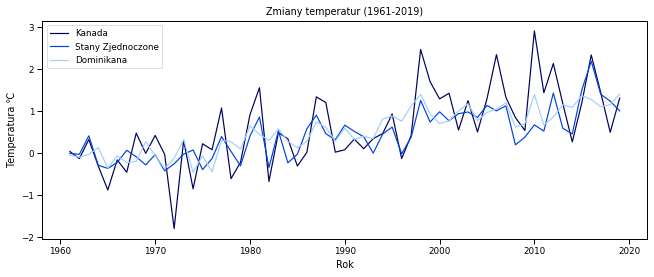

In [230]:
tfc_Canada = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Canada')]
tfc_US = NAmerica_tfcg[(NAmerica_tfcg.Area == 'United States of America')]
tfc_Dominican = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Dominican Republic')]
plt.plot(tfc_Canada.Year, tfc_Canada.Temp, label='Kanada', color='#00035b')
plt.plot(tfc_US.Year, tfc_US.Temp, label='Stany Zjednoczone', color='#0343df')
plt.plot(tfc_Dominican.Year, tfc_Dominican.Temp,
         label='Dominikana', color='#a2cffe')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103')
plt.title('Zmiany temperatur (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 Forest

In[62]:

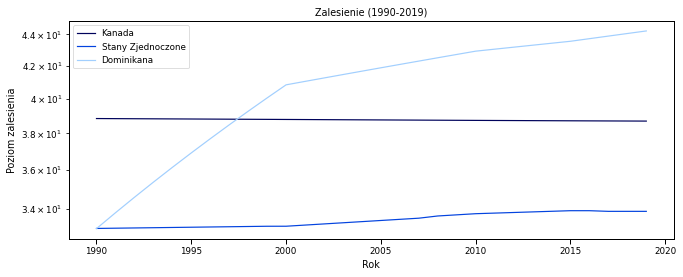

In [231]:
tfc_Canada = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Canada')]
tfc_US = NAmerica_tfcg[(NAmerica_tfcg.Area == 'United States of America')]
tfc_Dominican = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Dominican Republic')]
plt.plot(tfc_Canada.Year, tfc_Canada.Forest, label='Kanada', color='#00035b')
plt.plot(tfc_US.Year, tfc_US.Forest,
         label='Stany Zjednoczone', color='#0343df')
plt.plot(tfc_Dominican.Year, tfc_Dominican.Forest,
         label='Dominikana', color='#a2cffe')
plt.yscale('log')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Poziom zalesienia')
plt.title('Zalesienie (1990-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 CO2

In[63]:

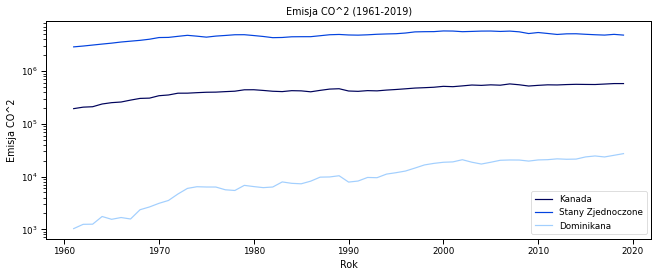

In [232]:
tfc_Canada = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Canada')]
tfc_US = NAmerica_tfcg[(NAmerica_tfcg.Area == 'United States of America')]
tfc_Dominican = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Dominican Republic')]
plt.plot(tfc_Canada.Year, tfc_Canada.CO2, label='Kanada', color='#00035b')
plt.plot(tfc_US.Year, tfc_US.CO2, label='Stany Zjednoczone', color='#0343df')
plt.plot(tfc_Dominican.Year, tfc_Dominican.CO2,
         label='Dominikana', color='#a2cffe')
plt.yscale('log')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Emisja CO^2')
plt.title('Emisja CO^2 (1961-2019)')
plt.legend()
plt.show()

In[]:<br>
Kanada: temp vs CO2

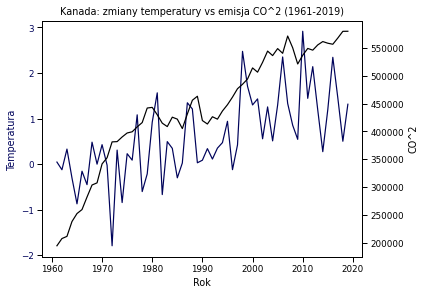

In [233]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#00035b')
ax1.plot(tfc_Canada.Year, tfc_Canada.Temp, label='Kanada', color='#00035b')
ax1.tick_params(axis='y', labelcolor='#00035b')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO^2', color='black')
ax2.plot(tfc_Canada.Year, tfc_Canada.CO2, label='Kanada', color='black')
ax2.tick_params(axis='y', labelcolor='black')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Kanada: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

we already handled the x-label with ax1

In[]:<br>
USA: temp vs CO2

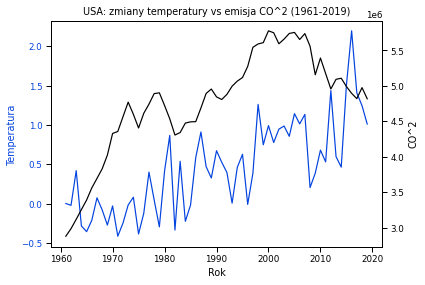

In [234]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#0343df')
ax1.plot(tfc_US.Year, tfc_US.Temp, label='USA', color='#0343df')
ax1.tick_params(axis='y', labelcolor='#0343df')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO^2', color='black')
ax2.plot(tfc_US.Year, tfc_US.CO2, label='USA', color='black')
ax2.tick_params(axis='y', labelcolor='black')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('USA: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

In[]:<br>
Dominikana: temp vs CO2

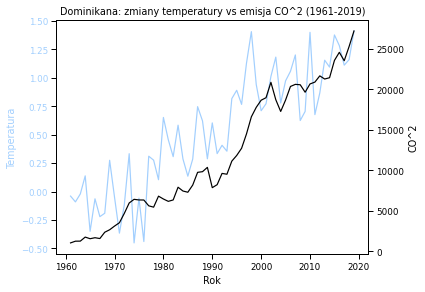

In [235]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#a2cffe')
ax1.plot(tfc_Dominican.Year, tfc_Dominican.Temp,
         label='Dominikana', color='#a2cffe')
ax1.tick_params(axis='y', labelcolor='#a2cffe')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO^2', color='black')
ax2.plot(tfc_Dominican.Year, tfc_Dominican.CO2,
         label='Dominikana', color='black')
ax2.tick_params(axis='y', labelcolor='black')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Dominikana: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

n[]:<br><br>
Correlation_Canada

In[64]:

In[65]:

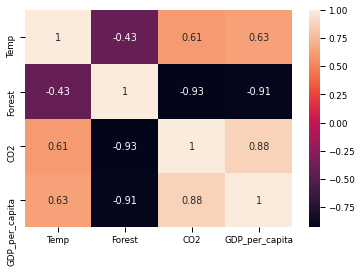

In [236]:
corr_Canada = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Canada')]
del corr_Canada['Area']
del corr_Canada['Year']
corr_Canada = corr_Canada.corr()
sns.heatmap(corr_Canada, annot=True)
plt.show()

n[]:<br><br>
Correlation_USA

In[66]:

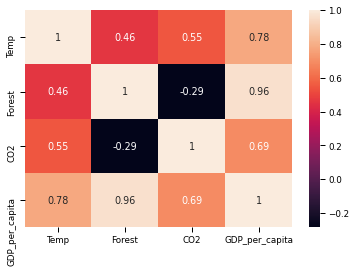

In [237]:
corr_USA = NAmerica_tfcg[(NAmerica_tfcg.Area == 'United States of America')]
del corr_USA['Area']
del corr_USA['Year']
corr_USA = corr_USA.corr()
sns.heatmap(corr_USA, annot=True)
plt.show()

In[67]:

n[]:<br><br>
Correlation_Dominican

In[68]:

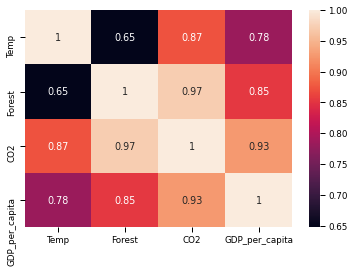

In [238]:
corr_Dominican = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Dominican Republic')]
del corr_Dominican['Area']
del corr_Dominican['Year']
corr_Dominican = corr_Dominican.corr()
sns.heatmap(corr_Dominican, annot=True)
plt.show()

In[69]:

#### AFRICA<br><br>
In[ ]:

Making individual variable for group purpose working

DataFrame with 3 countries from Africa

In[70]:

In [239]:
africa = df.copy()
africa_t = optional_1(africa)
africa_t_full = africa_t[(africa_t.Continent == 'Africa')]
africa_t_c3 = africa_t_full[(africa_t_full.Area == 'Algeria')
                            | (africa_t_full.Area == 'United Republic of Tanzania')
                            | (africa_t_full.Area == 'Mozambique')]
africa_t_c3 = africa_t_c3[(africa_t_c3.Months == 'Meteorological year')
                          & (africa_t_c3.Element == 'Temperature change')]
africa_t_c3

Area Continent  Continent_Code  Area_Code  \
100                       Algeria    Africa               1          4   
4894                   Mozambique    Africa               1        144   
7716  United Republic of Tanzania    Africa               1        215   

      Months_Code               Months  Element_Code             Element Unit  \
100          7020  Meteorological year          7271  Temperature change   °C   
4894         7020  Meteorological year          7271  Temperature change   °C   
7716         7020  Meteorological year          7271  Temperature change   °C   

      Y1961  ...  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  \
100   0.186  ...  2.359  1.492  1.238  1.267  1.774  1.224  1.866  1.630   
4894  0.409  ...  1.002  0.745  0.722  0.492  0.671  0.998  1.241  0.805   
7716  0.356  ...  1.194  0.885  1.002  1.041  1.071  1.320  1.260  1.626   

      Y2018  Y2019  
100   1.326  1.224  
4894  0.749  1.178  
7716  1.300  1.680  

[3 rows x 68 columns]

Inp[]:<br><br>
reparing data

In[71]:

In [240]:
africa_t_c3.columns = africa_t_c3.columns.str.replace('Y', '')
africa_t_c3.replace(to_replace="United Republic of Tanzania",
                    value="Tanzania", inplace=True)
del africa_t_c3['Area_Code']
del africa_t_c3['Months_Code']
del africa_t_c3['Months']
del africa_t_c3['Element']
del africa_t_c3['Unit']
del africa_t_c3['Element_Code']
del africa_t_c3['Continent']
del africa_t_c3['Continent_Code']
africa_t_c3

Area  1961   1962   1963   1964   1965  1966   1967   1968  1969  \
100      Algeria 0.186  0.101  0.045  0.212 -0.135 0.404 -0.024 -0.079 0.262   
4894  Mozambique 0.409  0.074 -0.366 -0.138 -0.519 0.141  0.115 -0.379 0.292   
7716    Tanzania 0.356 -0.274 -0.273 -0.409 -0.228 0.065  0.037 -0.465 0.355   

      ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
100   ... 2.359 1.492 1.238 1.267 1.774 1.224 1.866 1.630 1.326 1.224  
4894  ... 1.002 0.745 0.722 0.492 0.671 0.998 1.241 0.805 0.749 1.178  
7716  ... 1.194 0.885 1.002 1.041 1.071 1.320 1.260 1.626 1.300 1.680  

[3 rows x 60 columns]

In[]:<br><br>
Transformation table

In[72]:

In [241]:
africa_t_c3_trans = pd.melt(africa_t_c3, id_vars='Area')
africa_t_c3_trans = africa_t_c3_trans.rename(columns={'variable': 'Year',
                                                      'value': 'Temp'})
africa_t_c3_trans = africa_t_c3_trans.sort_values(by=['Area', 'Year'])
africa_t_c3_trans.Year = pd.to_numeric(africa_t_c3_trans.Year)
africa_t_c3_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    177 non-null    object 
 1   Year    177 non-null    int64  
 2   Temp    177 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ KB


In[]:<br><br>
DataFrame with Forests

In[73]:

In [242]:
africa_forest = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/forest.csv')
africa_forest = africa_forest[(africa_forest.country_name == 'Algeria')
                              | (africa_forest.country_name == 'Tanzania')
                              | (africa_forest.country_name == 'Mozambique')]

In[74]:

In [243]:
africa_forest = africa_forest.rename(columns={'year': 'Year',
                                              'country_name': 'Area',
                                              'value': 'Forest'})

In[75]:

In [244]:
del africa_forest['country_code']
africa_forest.Year = pd.to_numeric(africa_forest.Year)
africa_forest.isnull().sum()
africa_forest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1839 to 7488
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    93 non-null     object 
 1   Year    93 non-null     int64  
 2   Forest  93 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In[]:<br><br>
DataFrame with CO2

In[76]:

In [245]:
africa_co2 = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/co2.csv')
africa_co2 = africa_co2[(africa_co2.country_name == 'Algeria')
                        | (africa_co2.country_name == 'Tanzania')
                        | (africa_co2.country_name == 'Mozambique')]

In[77]:

In [246]:
africa_co2 = africa_co2.rename(columns={'year': 'Year',
                                        'country_name': 'Area',
                                        'value': 'CO2'})

In[78]:

In [247]:
del africa_co2['country_code']

In[79]:

In [248]:
africa_co2.isnull().sum()
africa_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 3182 to 12998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    180 non-null    object 
 1   Year    180 non-null    int64  
 2   CO2     180 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In[]:<br><br>
DataFrame with GDP

In[80]:

In [249]:
africa_gdp = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/GDP_percapita.csv')

In[81]:

In [250]:
africa_gdp = africa_gdp.rename(columns={'Country Name': 'Area'})

In[82]:

In [251]:
africa_gdp = africa_gdp[(africa_gdp.Area == 'Algeria')
                        | (africa_gdp.Area == 'Tanzania')
                        | (africa_gdp.Area == 'Mozambique')]

In[83]:

In [252]:
del africa_gdp['Code']
del africa_gdp['Unnamed: 65']

In[84]:

In [253]:
africa_gdp

Area    1960    1961    1962    1963    1964    1965    1966  \
60      Algeria 246.304 214.772 172.243 226.895 238.044 249.884 235.598   
165  Mozambique     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
246    Tanzania     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

       1967    1968  ...     2011     2012     2013     2014     2015  \
60  253.924 281.926  ... 5455.679 5592.220 5499.587 5493.057 4177.890   
165     NaN     NaN  ...  594.586  657.645  664.078  673.969  589.859   
246     NaN     NaN  ...  781.434  867.857  970.400 1030.078  947.933   

        2016     2017     2018     2019     2020  
60  3946.452 4109.698 4142.019 3989.668 3306.858  
165  428.927  461.415  503.318  506.642  448.544  
246  966.503 1004.907 1042.839 1085.885 1076.470  

[3 rows x 62 columns]

In[]:<br><br>
Transform GDP

In[85]:

In [254]:
africa_gdp_trans = pd.melt(africa_gdp, id_vars='Area')
africa_gdp_trans = africa_gdp_trans.rename(columns={'variable': 'Year',
                                                    'value': 'GDP_per_capita'})
africa_gdp_trans = africa_gdp_trans.sort_values(by=['Area', 'Year'])
africa_gdp_trans.Year = pd.to_numeric(africa_gdp_trans.Year)

In[86]:

In [255]:
africa_gdp_trans.Area.unique()

array(['Algeria', 'Mozambique', 'Tanzania'], dtype=object)

In[]:<br><br>
Join  temperature, forest & co2

In[87]:

In [256]:
africa_tf = pd.merge(africa_t_c3_trans, africa_forest,
                     on=['Area', 'Year'], how='left')
africa_tfc = pd.merge(africa_tf, africa_co2, on=['Area', 'Year'], how='left')
africa_tfcg = pd.merge(africa_tfc, africa_gdp_trans,
                       on=['Area', 'Year'], how='left')
africa_tfcg

Area  Year   Temp  Forest       CO2  GDP_per_capita
0     Algeria  1961  0.186     NaN  6065.218         214.772
1     Algeria  1962  0.101     NaN  5669.182         172.243
2     Algeria  1963  0.045     NaN  5427.160         226.895
3     Algeria  1964  0.212     NaN  5650.847         238.044
4     Algeria  1965 -0.135     NaN  6596.933         249.884
..        ...   ...    ...     ...       ...             ...
172  Tanzania  2015  1.320  54.290 11690.000         947.933
173  Tanzania  2016  1.260  53.760 11200.000         966.503
174  Tanzania  2017  1.626  53.231 11830.000        1004.907
175  Tanzania  2018  1.300  52.702 12000.000        1042.839
176  Tanzania  2019  1.680  52.172 12450.000        1085.885

[177 rows x 6 columns]

In[]:<br><br>
 Temperature

In[88]:

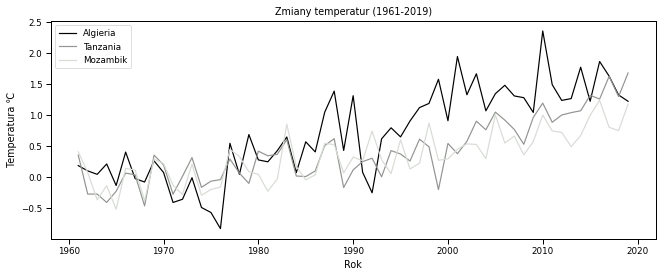

In [257]:
tfcg_Algeria = africa_tfcg[(africa_tfcg.Area == 'Algeria')]
tfcg_Tanzania = africa_tfcg[(africa_tfcg.Area == 'Tanzania')]
tfcg_Mozambique = africa_tfcg[(africa_tfcg.Area == 'Mozambique')]
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.Temp,
         label='Algieria', color='#000000')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.Temp,
         label='Tanzania', color='#929591')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.Temp,
         label='Mozambik', color='#d8dcd6')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103')
plt.title('Zmiany temperatur (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 ALGERIA: Temperature vs GDP

In[89]:

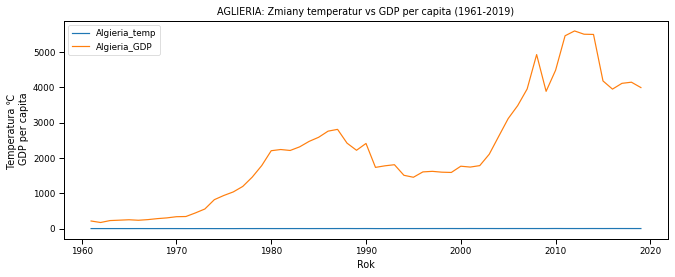

In [258]:
tfcg_Algeria = africa_tfcg[(africa_tfcg.Area == 'Algeria')]
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.Temp, label='Algieria_temp')
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.GDP_per_capita, label='Algieria_GDP')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103 \n GDP per capita')
plt.title('AGLIERIA: Zmiany temperatur vs GDP per capita (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 Tanzania: Temperature vs GDP

In[90]:

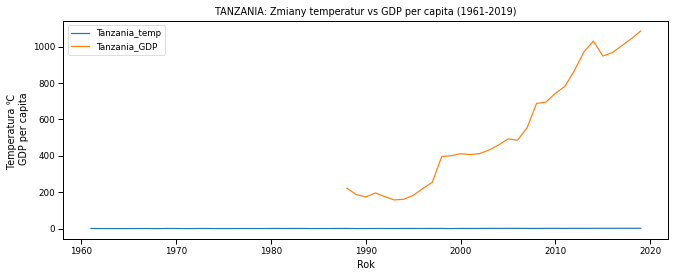

In [259]:
tfcg_Tanzania = africa_tfcg[(africa_tfcg.Area == 'Tanzania')]
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.Temp, label='Tanzania_temp')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.GDP_per_capita, label='Tanzania_GDP')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103 \n GDP per capita')
plt.title('TANZANIA: Zmiany temperatur vs GDP per capita (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 Mozambique: Temperature vs GDP

In[91]:

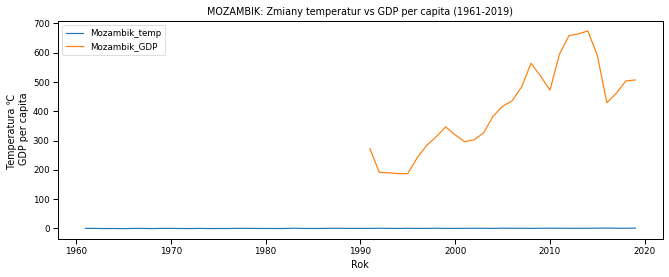

In [260]:
tfcg_Mozambique = africa_tfcg[(africa_tfcg.Area == 'Mozambique')]
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.Temp, label='Mozambik_temp')
plt.plot(tfcg_Mozambique.Year,
         tfcg_Mozambique.GDP_per_capita, label='Mozambik_GDP')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103 \n GDP per capita')
plt.title('MOZAMBIK: Zmiany temperatur vs GDP per capita (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 Forest

In[92]:

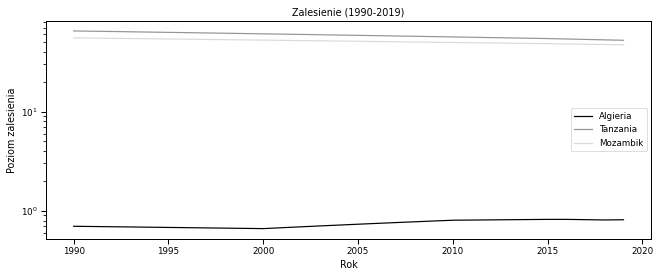

In [261]:
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.Forest,
         label='Algieria', color='#000000')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.Forest,
         label='Tanzania', color='#929591')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.Forest,
         label='Mozambik', color='#d8dcd6')
plt.yscale('log')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Poziom zalesienia')
plt.title('Zalesienie (1990-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 CO2

In[93]:

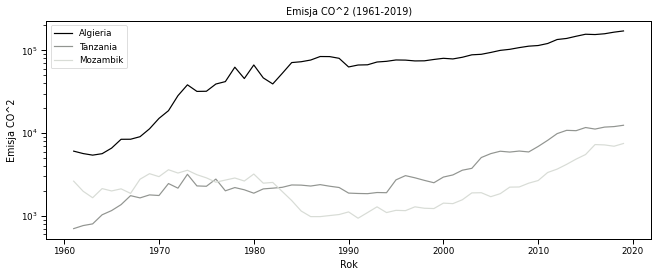

In [262]:
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.CO2,
         label='Algieria', color='#000000')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.CO2,
         label='Tanzania', color='#929591')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.CO2,
         label='Mozambik', color='#d8dcd6')
plt.yscale('log')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Emisja CO^2')
plt.title('Emisja CO^2 (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 GDP

In[94]:

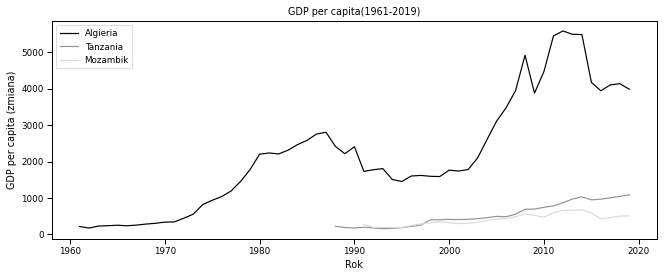

In [263]:
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.GDP_per_capita,
         label='Algieria', color='#000000')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.GDP_per_capita,
         label='Tanzania', color='#929591')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.GDP_per_capita,
         label='Mozambik', color='#d8dcd6')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('GDP per capita (zmiana)')
plt.title('GDP per capita(1961-2019)')
plt.legend()
plt.show()

In[]:<br>
Algeria: temp vs CO2

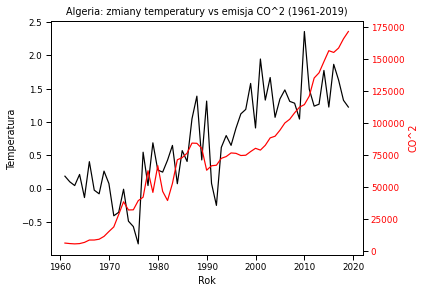

In [264]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#000000')
ax1.plot(tfcg_Algeria.Year, tfcg_Algeria.Temp,
         label='Algeria', color='#000000')
ax1.tick_params(axis='y', labelcolor='#000000')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO^2', color='red')  # we already handled the x-label with ax1
ax2.plot(tfcg_Algeria.Year, tfcg_Algeria.CO2, label='Algeria', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Algeria: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

In[]:<br>
Tanzania: temp vs CO2

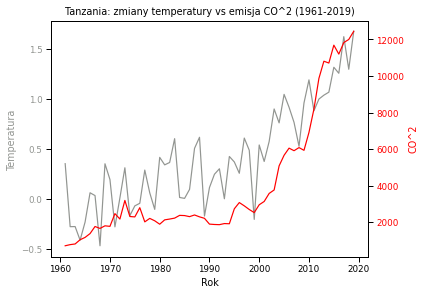

In [265]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#929591')
ax1.plot(tfcg_Tanzania.Year, tfcg_Tanzania.Temp,
         label='Tanzania', color='#929591')
ax1.tick_params(axis='y', labelcolor='#929591')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO^2', color='red')  # we already handled the x-label with ax1
ax2.plot(tfcg_Tanzania.Year, tfcg_Tanzania.CO2, label='Tanzania', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Tanzania: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

In[]:<br>
Mozambik: temp vs CO2

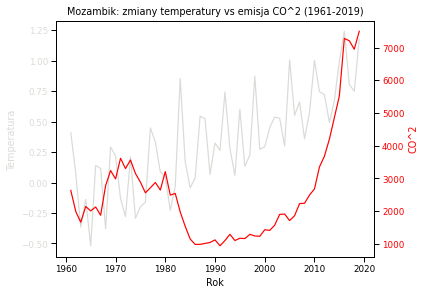

In [266]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#d8dcd6')
ax1.plot(tfcg_Mozambique.Year, tfcg_Mozambique.Temp,
         label='Mozambik', color='#d8dcd6')
ax1.tick_params(axis='y', labelcolor='#d8dcd6')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO^2', color='red')  # we already handled the x-label with ax1
ax2.plot(tfcg_Mozambique.Year, tfcg_Mozambique.CO2,
         label='Mozambik', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Mozambik: zmiany temperatury vs emisja CO^2 (1961-2019)')
plt.show()

n[]:<br><br>
Correlation_Algeria

In[95]:

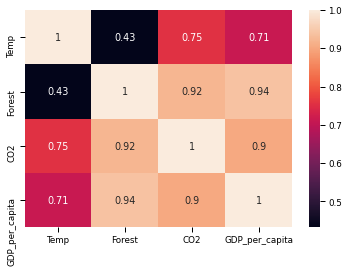

In [267]:
corr_Algeria = africa_tfcg[(africa_tfcg.Area == 'Algeria')]
del corr_Algeria['Area']
del corr_Algeria['Year']
corr_Algeria = corr_Algeria.corr()
sns.heatmap(corr_Algeria, annot=True)
plt.show()

In[96]:

n[]:<br><br>
Correlation_Tanzania

In[97]:

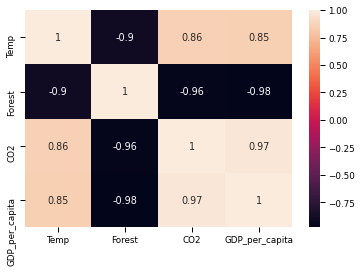

In [268]:
corr_Tanzania = africa_tfcg[(africa_tfcg.Area == 'Tanzania')]
del corr_Tanzania['Area']
del corr_Tanzania['Year']
corr_Tanzania = corr_Tanzania.corr()
sns.heatmap(corr_Tanzania, annot=True)
plt.show()

In[98]:

n[]:<br><br>
Correlation_Mozambique

In[99]:

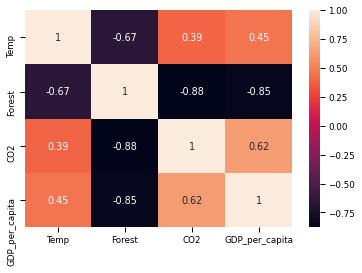

In [269]:
corr_Mozambique = africa_tfcg[(africa_tfcg.Area == 'Mozambique')]
del corr_Mozambique['Area']
del corr_Mozambique['Year']
corr_Mozambique = corr_Mozambique.corr()
sns.heatmap(corr_Mozambique, annot=True)
plt.show()

In[100]:

#### MATTHIAS

In[ ]:

Making individual variable for group purpose working

In[101]:

In [270]:
mateo = df.copy()

DataFrame with 5 countries from America (Northern & Central)

In[102]:

In [271]:
mateo1 = optional_1(mateo)

In[ ]:

Creating individual Dataframe for countries in Asia

In[103]:

In [272]:
asia = mateo1[(mateo1.Continent_Code == 2) & (
    mateo1.Months_Code == 7020) & (mateo1.Element_Code == 7271)]

In[ ]:

In[104]:

In [273]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = europe_t_ok.values.T

In[105]:

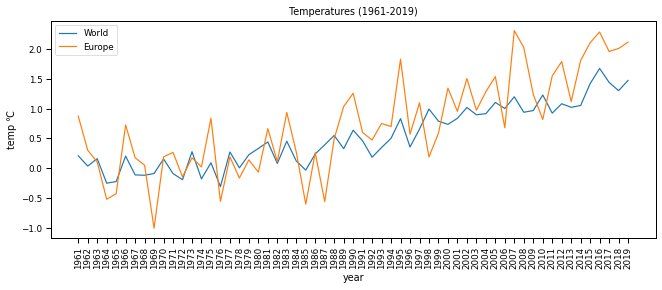

In [274]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Europe')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

Droping unnecessary columns

In[106]:

In [275]:
asia = asia.drop(columns=['Continent',
                          'Continent_Code',
                          'Area_Code',
                          'Months_Code',
                          'Months',
                          'Element_Code',
                          'Element',
                          'Unit'])

In[ ]:

Repalcing unnecessary marks with space

In[107]:

In [276]:
asia.columns = asia.columns.str.replace('Y', '')
asia['Area'] = asia['Area'].str.replace("'", ' ')

In[ ]:

Dataframe 3 Asia countries

In[108]:

In [277]:
asia_3 = asia[(asia.Area == 'India') | (
    asia.Area == 'Republic of Korea') | (asia.Area == 'China')]

In[ ]:

In[109]:

In [278]:
asia_3.isnull().sum()

Area    0
1961    0
1962    0
1963    0
1964    0
1965    0
1966    0
1967    0
1968    0
1969    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
dtype: int64

In[ ]:

Transform teble

In[110]:

In [279]:
asia_3_tmp = pd.melt(asia_3, id_vars='Area')

In[ ]:

Renameing columns

In[111]:

In [280]:
asia_3_tmp = asia_3_tmp.rename(columns={'variable': 'Year',
                                        'value': 'Temp'})

In[ ]:

In [281]:
asia_3_tmp = asia_3_tmp.sort_values(by=['Area', 'Year'])

Making x variables

In[112]:

In [282]:
x_mat = asia_3_tmp.Year.unique()

Converting object in to int64<br>
In[]:

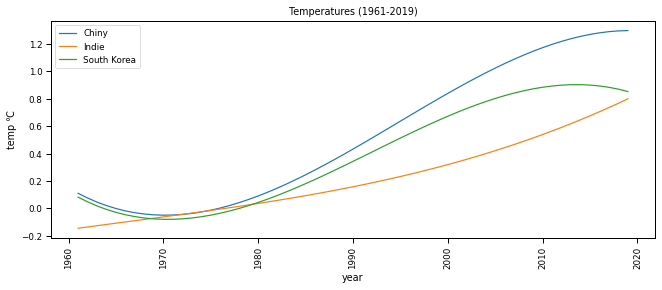

In [283]:
x_mat = x_mat.astype(np.int64)
y1_tmp = asia_3_tmp[asia_3_tmp.Area == 'China'].iloc[:, 2].values.T
y2_tmp = asia_3_tmp[asia_3_tmp.Area == 'India'].iloc[:, 2].values.T
y3_tmp = asia_3_tmp[asia_3_tmp.Area == 'Republic of Korea'].iloc[:, 2].values.T
bspl1 = splrep(x_mat, y1_tmp, s=4) #
bspl_y1 = splev(x_mat, bspl1) #
bspl2 = splrep(x_mat, y2_tmp, s=4)
bspl_y2 = splev(x_mat, bspl2)
bspl3 = splrep(x_mat, y3_tmp, s=12)
bspl_y3 = splev(x_mat, bspl3)
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x_mat, bspl_y1, label='Chiny') #
plt.plot(x_mat, bspl_y2, label='Indie')
plt.plot(x_mat, bspl_y3, label='South Korea')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

#### South America

In[ ]:

Making individual variable for group purpose working

##### DataFrame with 3 countries from South America

##### Temperature change in 3 countries of South America

In[18]:

In [284]:
SouthAmerica = df.copy()
SouthAmerica = optional_1(SouthAmerica)
SouthAmerica_whole = SouthAmerica[(SouthAmerica.Continent == 'Shouth America')]
SouthAmerica_temp = SouthAmerica_whole[(SouthAmerica_whole.Area == 'Argentina') | (
    SouthAmerica_whole.Area == 'Brazil') | (SouthAmerica_whole.Area == 'Peru')]
SouthAmerica_temp = SouthAmerica_temp[(SouthAmerica_temp.Months == 'Meteorological year') & (
    SouthAmerica_temp.Element == 'Temperature change')]
SouthAmerica_temp

Area       Continent  Continent_Code  Area_Code  Months_Code  \
338   Argentina  Shouth America               6          9         7020   
984      Brazil  Shouth America               6         21         7020   
5710       Peru  Shouth America               6        170         7020   

                   Months  Element_Code             Element Unit  Y1961  ...  \
338   Meteorological year          7271  Temperature change   °C  0.129  ...   
984   Meteorological year          7271  Temperature change   °C  0.165  ...   
5710  Meteorological year          7271  Temperature change   °C -0.023  ...   

      Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
338   0.078  0.324  0.748  0.394  0.912  0.910  0.459  1.057  0.828  0.709  
984   1.181  0.841  1.118  1.060  1.293  1.697  1.607  1.498  1.284  1.672  
5710  1.227  0.914  0.998  0.788  0.997  1.377  1.462  1.041  0.795  1.097  

[3 rows x 68 columns]

In [285]:
SouthAmerica_temp.columns = SouthAmerica_temp.columns.str.replace('Y', '')
del SouthAmerica_temp['Area_Code']
del SouthAmerica_temp['Months_Code']
del SouthAmerica_temp['Months']
del SouthAmerica_temp['Element']
del SouthAmerica_temp['Unit']
del SouthAmerica_temp['Element_Code']
del SouthAmerica_temp['Continent']
del SouthAmerica_temp['Continent_Code']
SouthAmerica_temp

Area   1961   1962  1963   1964   1965   1966   1967   1968  1969  \
338   Argentina  0.129 -0.058 0.146 -0.368  0.063 -0.190 -0.023  0.456 0.283   
984      Brazil  0.165 -0.180 0.149 -0.235 -0.079  0.051  0.072 -0.384 0.349   
5710       Peru -0.023 -0.160 0.061 -0.241  0.216  0.081 -0.279 -0.299 0.505   

      ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
338   ... 0.078 0.324 0.748 0.394 0.912 0.910 0.459 1.057 0.828 0.709  
984   ... 1.181 0.841 1.118 1.060 1.293 1.697 1.607 1.498 1.284 1.672  
5710  ... 1.227 0.914 0.998 0.788 0.997 1.377 1.462 1.041 0.795 1.097  

[3 rows x 60 columns]

In[ ]:

##### Modified table - Temperature change

In[19]:

In [286]:
SouthAmerica_temp_mdf = pd.melt(SouthAmerica_temp, id_vars='Area')
SouthAmerica_temp_mdf = SouthAmerica_temp_mdf.rename(
    columns={'variable': 'Year', 'value': 'Temperature'})
SouthAmerica_temp_mdf = SouthAmerica_temp_mdf.sort_values(by=['Area', 'Year'])
SouthAmerica_temp_mdf

Area  Year  Temperature
0    Argentina  1961        0.129
3    Argentina  1962       -0.058
6    Argentina  1963        0.146
9    Argentina  1964       -0.368
12   Argentina  1965        0.063
..         ...   ...          ...
164       Peru  2015        1.377
167       Peru  2016        1.462
170       Peru  2017        1.041
173       Peru  2018        0.795
176       Peru  2019        1.097

[177 rows x 3 columns]

In[20]:

In [287]:
SouthAmerica_temp_mdf.Year = pd.to_numeric(SouthAmerica_temp_mdf.Year)

In[ ]:

Temperature chart

In[21]:

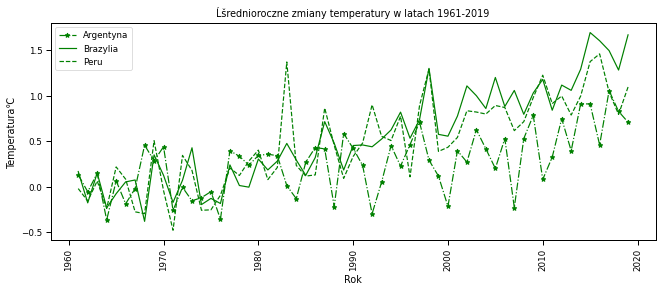

In [288]:
Argentina_temp = SouthAmerica_temp_mdf[(
    SouthAmerica_temp_mdf.Area == 'Argentina')]
Brazil_temp = SouthAmerica_temp_mdf[(SouthAmerica_temp_mdf.Area == 'Brazil')]
Peru_temp = SouthAmerica_temp_mdf[(SouthAmerica_temp_mdf.Area == 'Peru')]
plt.plot(Argentina_temp.Year, Argentina_temp.Temperature,
         'g*-.', label='Argentyna')
plt.plot(Brazil_temp.Year, Brazil_temp.Temperature, 'g-', label='Brazylia')
plt.plot(Peru_temp.Year, Peru_temp.Temperature, 'g--', label='Peru')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura\u2103')
plt.title('Ĺšrednioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.show()

In[ ]:

##### Value of CO2 in 3 countries of South America

In[22]:

In [289]:
SouthAmerica_CO2 = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/co2.csv')

In[23]:

In [290]:
del SouthAmerica_CO2['country_code']

In[24]:

In [291]:
SouthAmerica_CO2 = SouthAmerica_CO2[(SouthAmerica_CO2.country_name == 'Argentina') | (SouthAmerica_CO2.country_name == 'Brazil')
                                    | (SouthAmerica_CO2.country_name == 'Peru')]
SouthAmerica_CO2

country_name  year     value
507     Argentina  1960 48815.104
508     Argentina  1961 51180.319
509     Argentina  1962 53695.881
510     Argentina  1963 50083.886
511     Argentina  1964 55727.399
...           ...   ...       ...
9885         Peru  2015 54549.999
9886         Peru  2016 56860.001
9887         Peru  2017 54270.000
9888         Peru  2018 54590.000
9889         Peru  2019 56750.000

[180 rows x 3 columns]

In[472]:

In [292]:
SouthAmerica_CO2 = SouthAmerica_CO2.rename(
    columns={'country_name': 'Area', 'year': 'Year', 'value': 'CO2'})
SouthAmerica_CO2

Area  Year       CO2
507   Argentina  1960 48815.104
508   Argentina  1961 51180.319
509   Argentina  1962 53695.881
510   Argentina  1963 50083.886
511   Argentina  1964 55727.399
...         ...   ...       ...
9885       Peru  2015 54549.999
9886       Peru  2016 56860.001
9887       Peru  2017 54270.000
9888       Peru  2018 54590.000
9889       Peru  2019 56750.000

[180 rows x 3 columns]

In[473]:

In [293]:
SouthAmerica_CO2.Year = pd.to_numeric(SouthAmerica_CO2.Year)

In[ ]:

Temperature change and value of CO2

In[366]:

In [294]:
SouthAmerica_temp_CO2 = pd.merge(SouthAmerica_temp_mdf, SouthAmerica_CO2, on=[
                                 'Area', 'Year'], how='left')
SouthAmerica_temp_CO2

Area  Year  Temperature       CO2
0    Argentina  1961        0.129 51180.319
1    Argentina  1962       -0.058 53695.881
2    Argentina  1963        0.146 50083.886
3    Argentina  1964       -0.368 55727.399
4    Argentina  1965        0.063 58866.351
..         ...   ...          ...       ...
172       Peru  2015        1.377 54549.999
173       Peru  2016        1.462 56860.001
174       Peru  2017        1.041 54270.000
175       Peru  2018        0.795 54590.000
176       Peru  2019        1.097 56750.000

[177 rows x 4 columns]

In[ ]:

Regression - value of CO2

In[381]:

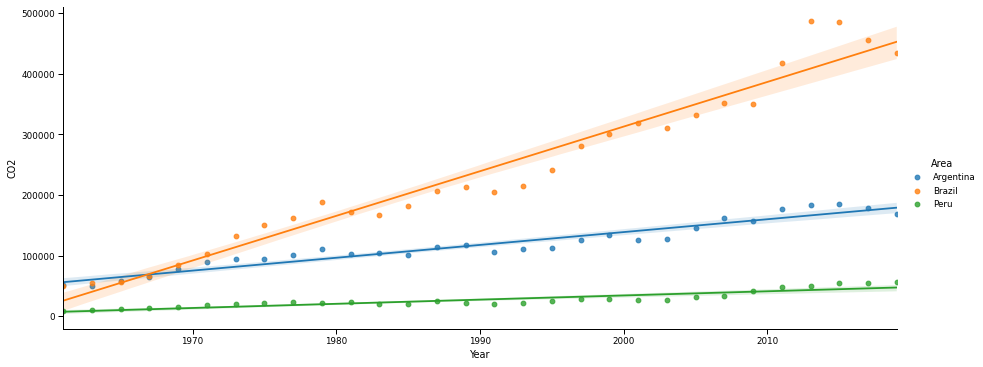

In [295]:
sns.set_context('paper')
sns.lmplot(data=SouthAmerica_CO2[((SouthAmerica_CO2['Area'] == 'Argentina')
                                  | (SouthAmerica_CO2['Area'] == 'Brazil')
                                  | (SouthAmerica_CO2['Area'] == 'Peru')) & (SouthAmerica_CO2['Year'])],
           x="Year",
           y="CO2",
           aspect=2.5,
           hue='Area')
plt.show()

In[ ]:

##### GDP per capita in 3 countries of South America

In[474]:

In [296]:
SouthAmerica_GDP = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/GDP_percapita.csv')

In[475]:

In [297]:
del SouthAmerica_GDP['Code']
del SouthAmerica_GDP['Unnamed: 65']

In[476]:

In [298]:
SouthAmerica_GDP = SouthAmerica_GDP.rename(columns={'Country Name': 'Area'})

In[477]:

In [299]:
SouthAmerica_GDP = SouthAmerica_GDP[(SouthAmerica_GDP.Area == 'Argentina') | (SouthAmerica_GDP.Area == 'Brazil')
                                    | (SouthAmerica_GDP.Area == 'Peru')]
SouthAmerica_GDP

Area    1960    1961     1962    1963     1964     1965     1966  \
9    Argentina     NaN     NaN 1155.891 850.305 1173.238 1279.114 1272.803   
29      Brazil     NaN 232.481  251.348 295.632  258.605  269.456  330.041   
186       Peru 253.265 277.569  305.762 325.516  382.744  441.182  507.531   

        1967     1968  ...      2011      2012      2013      2014      2015  \
9   1062.543 1141.080  ... 12848.864 13082.664 13080.255 12334.798 13789.060   
29   353.111  375.391  ... 13245.387 12370.223 12300.387 12112.835  8813.990   
186  500.873  450.401  ...  5869.324  6528.972  6756.753  6672.877  6229.101   

         2016      2017      2018      2019     2020  
9   12790.242 14613.042 11795.159 10056.638 8579.018  
29   8710.063  9928.676  9151.382  8897.553 6796.845  
186  6204.996  6710.508  6957.793  7027.612 6126.875  

[3 rows x 62 columns]

In[ ]:

##### Modified table - GDP per capita

In[478]:

In [300]:
SouthAmerica_GDP_mdf = pd.melt(SouthAmerica_GDP, id_vars='Area')
SouthAmerica_GDP_mdf = SouthAmerica_GDP_mdf.rename(
    columns={'variable': 'Year', 'value': 'GDP_per_capita'})
SouthAmerica_GDP_mdf = SouthAmerica_GDP_mdf.sort_values(by=['Area', 'Year'])
SouthAmerica_GDP_mdf

Area  Year  GDP_per_capita
0    Argentina  1960             NaN
3    Argentina  1961             NaN
6    Argentina  1962        1155.891
9    Argentina  1963         850.305
12   Argentina  1964        1173.238
..         ...   ...             ...
170       Peru  2016        6204.996
173       Peru  2017        6710.508
176       Peru  2018        6957.793
179       Peru  2019        7027.612
182       Peru  2020        6126.875

[183 rows x 3 columns]

In[479]:

In [301]:
SouthAmerica_GDP_mdf.Year = pd.to_numeric(SouthAmerica_GDP_mdf.Year)

In[ ]:

Regression - GDP per capita

In[436]:

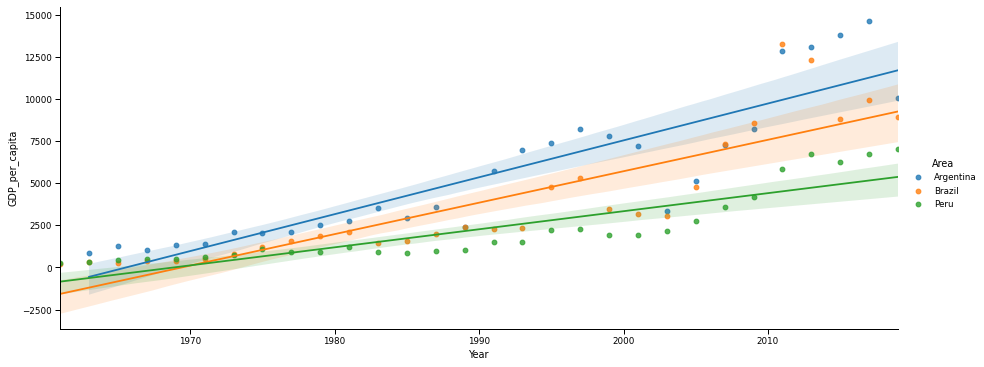

In [302]:
sns.set_context('paper')
sns.lmplot(data=SouthAmerica_GDP_mdf[((SouthAmerica_GDP_mdf['Area'] == 'Argentina')
                                      | (SouthAmerica_GDP_mdf['Area'] == 'Brazil')
                                      | (SouthAmerica_GDP_mdf['Area'] == 'Peru')) & (SouthAmerica_GDP_mdf['Year'])],
           x="Year",
           y="GDP_per_capita",
           aspect=2.5,
           hue='Area')
plt.show()

In[ ]:

GDP per capita other charts

In[427]:

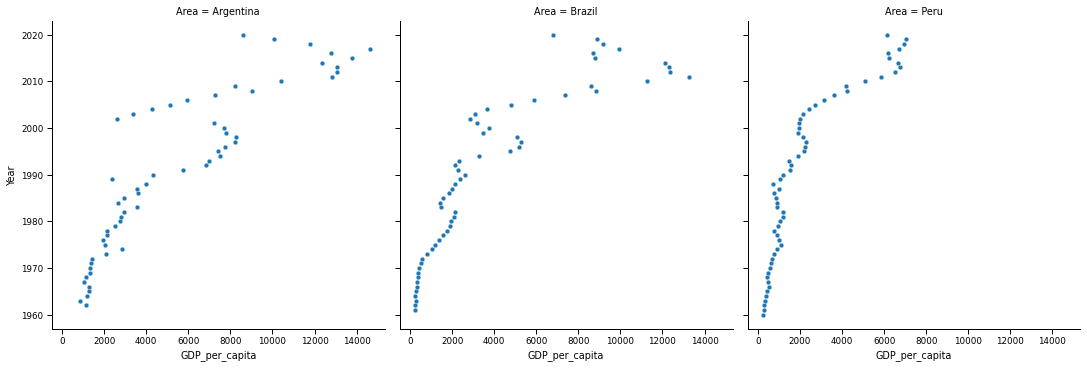

In [303]:
sns.set_context('paper')
sns.relplot(data=SouthAmerica_GDP_mdf[(SouthAmerica_GDP_mdf['Area'] == 'Argentina')
                                      | (SouthAmerica_GDP_mdf['Area'] == 'Brazil')
                                      | (SouthAmerica_GDP_mdf['Area'] == 'Peru')],
            x="GDP_per_capita",
            y="Year",
            kind='scatter',
            col='Area')
plt.show()

In[422]:

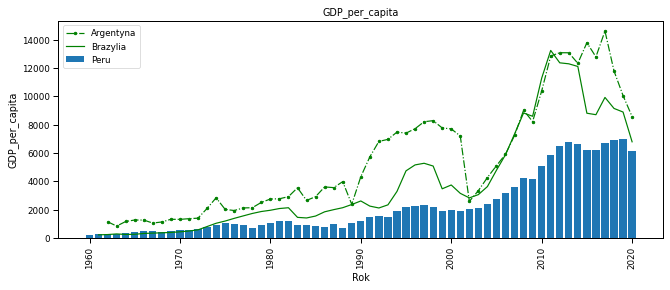

In [304]:
Argentina_GDP = SouthAmerica_GDP_mdf[(
    SouthAmerica_GDP_mdf.Area == 'Argentina')]
Brazil_GDP = SouthAmerica_GDP_mdf[(SouthAmerica_GDP_mdf.Area == 'Brazil')]
Peru_GDP = SouthAmerica_GDP_mdf[(SouthAmerica_GDP_mdf.Area == 'Peru')]
plt.plot(Argentina_GDP.Year, Argentina_GDP.GDP_per_capita,
         'g-..', label='Argentyna')
plt.plot(Brazil_GDP.Year, Brazil_GDP.GDP_per_capita, 'g-', label='Brazylia')
plt.bar(Peru_GDP.Year, Peru_GDP.GDP_per_capita, label='Peru')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('GDP_per_capita')
plt.title('GDP_per_capita')
plt.legend()
plt.show()

In[ ]:

##### Percent value of forestation in 3 countries of South America

In[33]:

In [305]:
SouthAmerica_forestation = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/forest.csv')

In[34]:

In [306]:
del SouthAmerica_forestation['country_code']

In[35]:

In [307]:
SouthAmerica_forestation = SouthAmerica_forestation[(SouthAmerica_forestation.country_name == 'Argentina') | (SouthAmerica_forestation.country_name == 'Brazil')
                                                    | (SouthAmerica_forestation.country_name == 'Peru')]
SouthAmerica_forestation

country_name  year  value
279     Argentina  1990 12.864
280     Argentina  1991 12.797
281     Argentina  1992 12.730
282     Argentina  1993 12.664
283     Argentina  1994 12.597
...           ...   ...    ...
5665         Peru  2016 57.039
5666         Peru  2017 56.902
5667         Peru  2018 56.778
5668         Peru  2019 56.643
5669         Peru  2020 56.508

[93 rows x 3 columns]

In[36]:

In [308]:
SouthAmerica_forestation = SouthAmerica_forestation.rename(
    columns={'country_name': 'Area', 'year': 'Year', 'value': 'Forestation_percent'})
SouthAmerica_forestation

Area  Year  Forestation_percent
279   Argentina  1990               12.864
280   Argentina  1991               12.797
281   Argentina  1992               12.730
282   Argentina  1993               12.664
283   Argentina  1994               12.597
...         ...   ...                  ...
5665       Peru  2016               57.039
5666       Peru  2017               56.902
5667       Peru  2018               56.778
5668       Peru  2019               56.643
5669       Peru  2020               56.508

[93 rows x 3 columns]

In[37]:

In [309]:
SouthAmerica_forestation.Year = pd.to_numeric(SouthAmerica_forestation.Year)

In[ ]:

Forestation

In[38]:

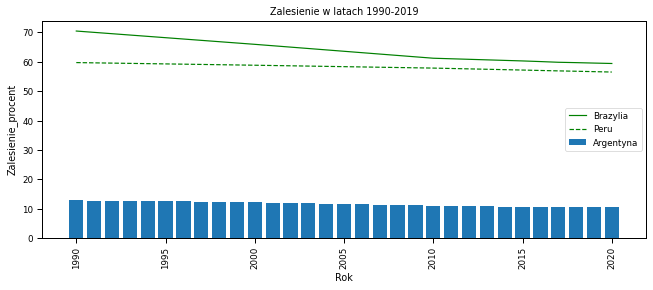

In [310]:
Argentina_forestation = SouthAmerica_forestation[(
    SouthAmerica_forestation.Area == 'Argentina')]
Brazil_forestation = SouthAmerica_forestation[(
    SouthAmerica_forestation.Area == 'Brazil')]
Peru_forestation = SouthAmerica_forestation[(
    SouthAmerica_forestation.Area == 'Peru')]
plt.bar(Argentina_forestation.Year,
        Argentina_forestation.Forestation_percent, label='Argentyna')
plt.plot(Brazil_forestation.Year,
         Brazil_forestation.Forestation_percent, 'g-', label='Brazylia')
plt.plot(Peru_forestation.Year,
         Peru_forestation.Forestation_percent, 'g--', label='Peru')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Zalesienie_procent')
plt.title('Zalesienie w latach 1990-2019')
plt.legend()
plt.show()

In[ ]:

##### Energy use per capita

In[485]:

In [311]:
SouthAmerica_energy = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/energy_use_per_capita.csv')

In[486]:

In [312]:
del SouthAmerica_energy['Code']

In[487]:

In [313]:
SouthAmerica_energy = SouthAmerica_energy.rename(columns={'Entity': 'Area',
                                                          'Primary energy consumption per capita (kWh/person)': 'Energy_use_kWh_per_capita'})

In[449]:

In [314]:
SouthAmerica_energy = SouthAmerica_energy[(SouthAmerica_energy.Area == 'Argentina')
                                          | (SouthAmerica_energy.Area == 'Brazil')
                                          | (SouthAmerica_energy.Area == 'Peru')]
SouthAmerica_energy

Area  Year  Energy_use_kWh_per_capita
314   Argentina  1965                  14896.342
315   Argentina  1966                  15139.183
316   Argentina  1967                  15336.857
317   Argentina  1968                  15611.571
318   Argentina  1969                  15886.891
...         ...   ...                        ...
7167       Peru  2017                   9973.517
7168       Peru  2018                  10310.951
7169       Peru  2019                  10407.200
7170       Peru  2020                   8666.730
7171       Peru  2021                   9883.832

[171 rows x 3 columns]

In[488]:

In [315]:
SouthAmerica_energy.Year = pd.to_numeric(SouthAmerica_energy.Year)

In[ ]:

Regression - Energy use

In[453]:

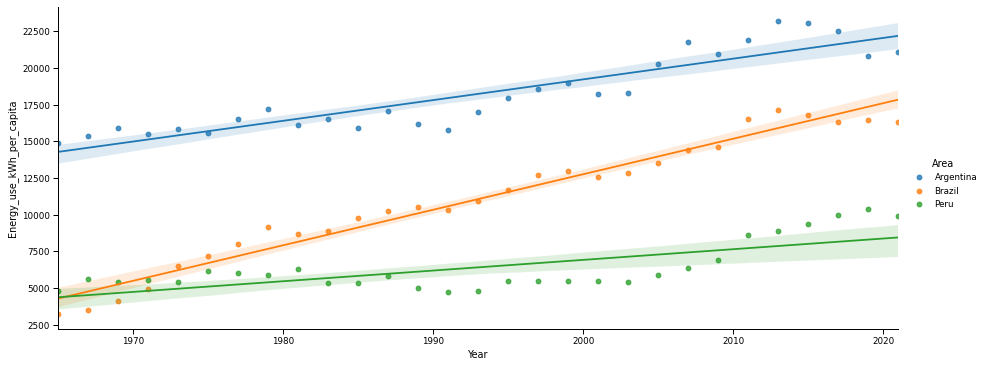

In [316]:
sns.set_context('paper')
sns.lmplot(data=SouthAmerica_energy[((SouthAmerica_energy['Area'] == 'Argentina')
                                     | (SouthAmerica_energy['Area'] == 'Brazil')
                                     | (SouthAmerica_energy['Area'] == 'Peru')) & (SouthAmerica_energy['Year'])],
           x="Year",
           y="Energy_use_kWh_per_capita",
           aspect=2.5,
           hue='Area')
plt.show()

In[ ]:

##### Urban population (% of total population) in 3 countries of South America

In[489]:

In [317]:
SouthAmerica_urban = pd.read_csv('https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/share-of-population-urban.csv')

In[490]:

In [318]:
del SouthAmerica_urban['Code']

In[491]:

In [319]:
SouthAmerica_urban = SouthAmerica_urban.rename(columns={'Entity': 'Area',
                                                        'Urban population (% of total population)': 'Urbanization_rate_percent'})

In[492]:

In [320]:
SouthAmerica_urban = SouthAmerica_urban[(SouthAmerica_urban.Area == 'Argentina')
                                        | (SouthAmerica_urban.Area == 'Brazil')
                                        | (SouthAmerica_urban.Area == 'Peru')]
SouthAmerica_urban

Area  Year  Urbanization_rate_percent
427    Argentina  1960                     73.611
428    Argentina  1961                     74.217
429    Argentina  1962                     74.767
430    Argentina  1963                     75.309
431    Argentina  1964                     75.844
...          ...   ...                        ...
10051       Peru  2016                     77.539
10052       Peru  2017                     77.720
10053       Peru  2018                     77.907
10054       Peru  2019                     78.099
10055       Peru  2020                     78.297

[183 rows x 3 columns]

In[493]:

In [321]:
SouthAmerica_urban.Year = pd.to_numeric(SouthAmerica_urban.Year)

In[ ]:

Regression - Urbanization

In[464]:

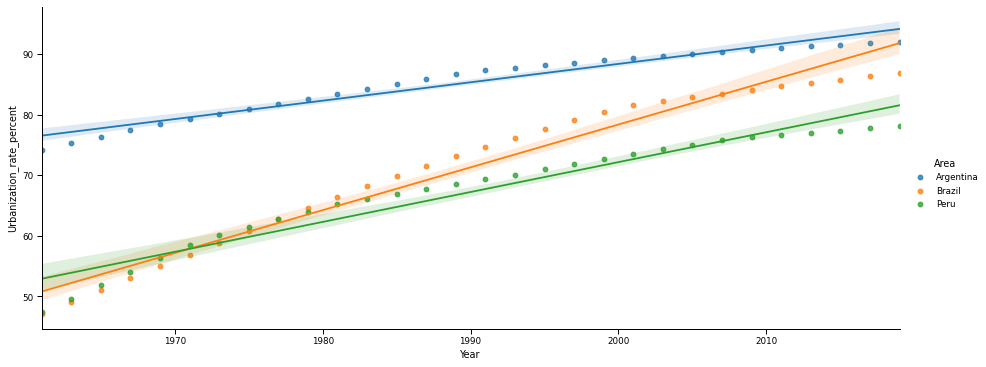

In [322]:
sns.set_context('paper')
sns.lmplot(data=SouthAmerica_urban[((SouthAmerica_urban['Area'] == 'Argentina')
                                    | (SouthAmerica_urban['Area'] == 'Brazil')
                                    | (SouthAmerica_urban['Area'] == 'Peru')) & (SouthAmerica_urban['Year'])],
           x="Year",
           y="Urbanization_rate_percent",
           aspect=2.5,
           hue='Area')
plt.show()

In[ ]:

Summarized tabel: Temperature change + CO2 + GDP per capita + Forestation + energy use + urbanization

In[497]:

In [323]:
SouthAmerica_temp_CO2 = pd.merge(SouthAmerica_temp_mdf, SouthAmerica_CO2, on=[
                                 'Area', 'Year'], how='left')
SouthAmerica_temp_CO2_GDP = pd.merge(
    SouthAmerica_temp_CO2, SouthAmerica_GDP_mdf,  on=['Area', 'Year'], how='left')
SouthAmerica_temp_CO2_GDP_forest = pd.merge(
    SouthAmerica_temp_CO2_GDP, SouthAmerica_forestation, on=['Area', 'Year'], how='left')
SouthAmerica_temp_CO2_GDP_forest_en = pd.merge(
    SouthAmerica_temp_CO2_GDP_forest, SouthAmerica_energy, on=['Area', 'Year'], how='left')
SouthAmerica_temp_CO2_GDP_forest_en_urb = pd.merge(
    SouthAmerica_temp_CO2_GDP_forest_en, SouthAmerica_urban, on=['Area', 'Year'], how='left')
SouthAmerica_temp_CO2_GDP_forest_en_urb

Area  Year  Temperature       CO2  GDP_per_capita  \
0    Argentina  1961        0.129 51180.319             NaN   
1    Argentina  1962       -0.058 53695.881        1155.891   
2    Argentina  1963        0.146 50083.886         850.305   
3    Argentina  1964       -0.368 55727.399        1173.238   
4    Argentina  1965        0.063 58866.351        1279.114   
..         ...   ...          ...       ...             ...   
172       Peru  2015        1.377 54549.999        6229.101   
173       Peru  2016        1.462 56860.001        6204.996   
174       Peru  2017        1.041 54270.000        6710.508   
175       Peru  2018        0.795 54590.000        6957.793   
176       Peru  2019        1.097 56750.000        7027.612   

     Forestation_percent  Energy_use_kWh_per_capita  Urbanization_rate_percent  
0                    NaN                        NaN                     74.217  
1                    NaN                        NaN                     74.767  
2                    NaN                        NaN                     75.309  
3                    NaN                        NaN                     75.844  
4                    NaN                  14896.342                     76.369  
..                   ...                        ...                        ...  
172               57.183                   9338.733                     77.357  
173               57.039                   9832.510                     77.539  
174               56.902                   9973.517                     77.720  
175               56.778                  10310.951                     77.907  
176               56.643                  10407.200                     78.099  

[177 rows x 8 columns]

In[ ]:

Correlation Argentina

In[500]:

In [324]:
corr_Argentina = SouthAmerica_temp_CO2_GDP_forest_en_urb[(
    SouthAmerica_temp_CO2_GDP_forest_en_urb.Area == 'Argentina')]

In[501]:

In [325]:
del corr_Argentina['Area']
del corr_Argentina['Year']

In[502]:

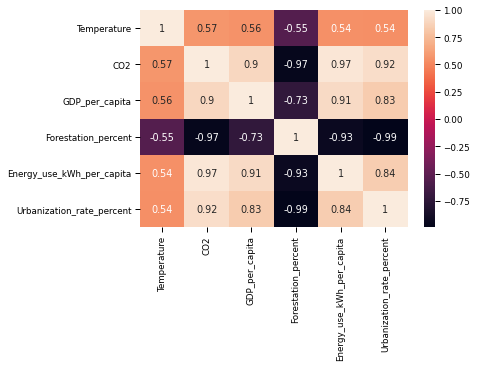

In [326]:
corr_Argentina = corr_Argentina.corr()
sns.heatmap(corr_Argentina, annot=True)
plt.show()

In[ ]:

In[ ]:

Correlation Brazil

In[503]:

In [327]:
corr_Brazil = SouthAmerica_temp_CO2_GDP_forest_en_urb[(
    SouthAmerica_temp_CO2_GDP_forest_en_urb.Area == 'Brazil')]

In[504]:

In [328]:
del corr_Brazil['Area']
del corr_Brazil['Year']

In[505]:

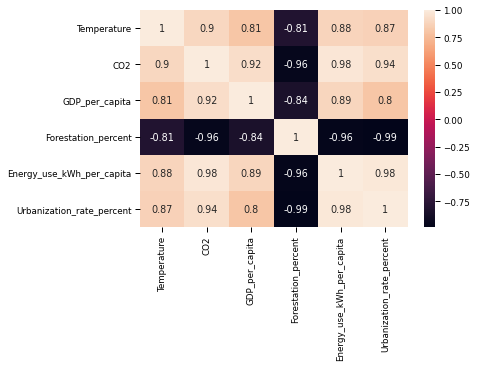

In [329]:
corr_Brazil = corr_Brazil.corr()
sns.heatmap(corr_Brazil, annot=True)
plt.show()

In[ ]:

Correlation Peru

In[506]:

In [330]:
corr_Peru = SouthAmerica_temp_CO2_GDP_forest_en_urb[(
    SouthAmerica_temp_CO2_GDP_forest_en_urb.Area == 'Peru')]

In[507]:

In [331]:
del corr_Peru['Area']
del corr_Peru['Year']

In[508]:

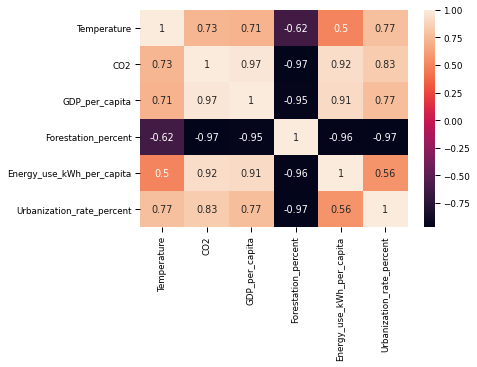

In [332]:
corr_Peru = corr_Peru.corr()
sns.heatmap(corr_Peru, annot=True)
plt.show()

In[ ]:

#### Antarctica

In[ ]:

Making individual variable for group purpose working

##### Temperature change in Antarctica

In[526]:

In [333]:
Antarctica = df.copy()
Antarctica = optional_1(Antarctica)
Antarctica_temp = Antarctica[(Antarctica.Continent == 'Antarctica')]
Antarctica_temp = Antarctica[(Antarctica.Area == 'Antarctica')]
Antarctica_temp = Antarctica_temp[(Antarctica_temp.Months == 'Meteorological year') & (
    Antarctica_temp.Element == 'Temperature change')]
Antarctica_temp

Area   Continent  Continent_Code  Area_Code  Months_Code  \
270  Antarctica  Antarctica               7         30         7020   

                  Months  Element_Code             Element Unit  Y1961  ...  \
270  Meteorological year          7271  Temperature change   °C  0.280  ...   

     Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
270  0.813  0.725 -0.216  1.738  0.546 -0.095  0.217  0.764  1.454  0.615  

[1 rows x 68 columns]

In [334]:
Antarctica_temp.columns = Antarctica_temp.columns.str.replace('Y', '')
del Antarctica_temp['Area_Code']
del Antarctica_temp['Months_Code']
del Antarctica_temp['Months']
del Antarctica_temp['Element']
del Antarctica_temp['Unit']
del Antarctica_temp['Element_Code']
del Antarctica_temp['Continent']
del Antarctica_temp['Continent_Code']
Antarctica_temp

Area  1961   1962  1963   1964   1965   1966  1967   1968   1969  \
270  Antarctica 0.280 -0.227 0.135 -0.366 -0.099 -0.240 0.133 -0.088 -0.256   

     ...  2010  2011   2012  2013  2014   2015  2016  2017  2018  2019  
270  ... 0.813 0.725 -0.216 1.738 0.546 -0.095 0.217 0.764 1.454 0.615  

[1 rows x 60 columns]

In[ ]:

##### Modified table - Temperature change

In[527]:

In [335]:
Antarctica_temp_mdf = pd.melt(Antarctica_temp, id_vars='Area')
Antarctica_temp_mdf = Antarctica_temp_mdf.rename(
    columns={'variable': 'Year', 'value': 'Temperature'})
Antarctica_temp_mdf

Area  Year  Temperature
0   Antarctica  1961        0.280
1   Antarctica  1962       -0.227
2   Antarctica  1963        0.135
3   Antarctica  1964       -0.366
4   Antarctica  1965       -0.099
5   Antarctica  1966       -0.240
6   Antarctica  1967        0.133
7   Antarctica  1968       -0.088
8   Antarctica  1969       -0.256
9   Antarctica  1970       -0.133
10  Antarctica  1971        0.280
11  Antarctica  1972        0.621
12  Antarctica  1973        0.011
13  Antarctica  1974        0.169
14  Antarctica  1975        0.177
15  Antarctica  1976       -0.634
16  Antarctica  1977        0.250
17  Antarctica  1978       -0.118
18  Antarctica  1979       -0.234
19  Antarctica  1980        0.565
20  Antarctica  1981        0.706
21  Antarctica  1982       -0.031
22  Antarctica  1983       -0.693
23  Antarctica  1984        0.132
24  Antarctica  1985        0.180
25  Antarctica  1986       -0.269
26  Antarctica  1987       -0.698
27  Antarctica  1988        0.956
28  Antarctica  1989       -0.436
29  Antarctica  1990        0.289
30  Antarctica  1991        0.678
31  Antarctica  1992        0.334
32  Antarctica  1993       -0.734
33  Antarctica  1994       -0.234
34  Antarctica  1995       -0.285
35  Antarctica  1996        0.778
36  Antarctica  1997       -0.556
37  Antarctica  1998       -0.484
38  Antarctica  1999       -0.594
39  Antarctica  2000       -0.778
40  Antarctica  2001       -0.062
41  Antarctica  2002        1.259
42  Antarctica  2003       -0.474
43  Antarctica  2004        0.129
44  Antarctica  2005        0.875
45  Antarctica  2006       -0.081
46  Antarctica  2007        0.680
47  Antarctica  2008        0.605
48  Antarctica  2009        1.314
49  Antarctica  2010        0.813
50  Antarctica  2011        0.725
51  Antarctica  2012       -0.216
52  Antarctica  2013        1.738
53  Antarctica  2014        0.546
54  Antarctica  2015       -0.095
55  Antarctica  2016        0.217
56  Antarctica  2017        0.764
57  Antarctica  2018        1.454
58  Antarctica  2019        0.615

In[ ]:

In[530]:

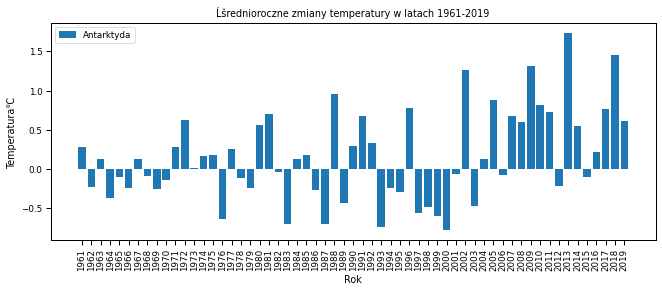

In [336]:
Antarctica_temp_change = Antarctica_temp_mdf[(
    Antarctica_temp_mdf.Area == 'Antarctica')]
plt.bar(Antarctica_temp_change.Year,
        Antarctica_temp_change.Temperature, label='Antarktyda')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura\u2103')
plt.title('Ĺšrednioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.show()

In[ ]:

In[ ]:

In[ ]:

#### URSULA

In[ ]:

Making individual variable for group purpose working

In[ ]:

In [337]:
urs = df.copy()

In[ ]: